### **Introduction to the Dataset:**

This dataset comprises data from Ambition Box, a platform dedicated to offering comprehensive insights into the performance and employee experiences of 10,000 diverse companies. Ambition Box facilitates users in exploring company reviews, ratings, salaries, interviews, and more. The dataset encompasses crucial information encapsulating various facets of these companies. Key columns include:

- **Company_name:** The distinct identifier representing each company on Ambition Box.
- **Description:** A concise overview sourced from the company's profile or website, providing context about its core functions and values.
- **Ratings:** The aggregate user-provided rating, serving as an overall indicator of company satisfaction.
- **Highly_rated_for:** Specific areas or aspects within a company that receive commendable ratings from users.
- **Critically_rated_for:** Areas or aspects that users consider critically significant, often influencing overall company perception.
- **Total_reviews:** The cumulative count of user-submitted reviews, reflecting the level of engagement and feedback for each company.
- **Avg_salary:** The average salary reported for the company, if available, offering insights into the compensation structure.
- **Interviews_taken:** The number of interviews conducted by the company, potentially indicative of recruitment activity and employee demand.
- **Total_jobs_available:** The total number of job positions within the company, shedding light on its workforce scale.
- **Total_benefits:** Information on benefits offered by the company, if provided, giving a glimpse into the comprehensive employee package.

**Objective:**
Explore and analyze key facets of 10,000 companies sourced from Ambition Box. In todays competitive job market, understanding what makes a company attractive to potential employees is crucial for companies looking to attract talented employees. Given diverse metrics, we need to analyze what factors contribute most to a company's attractiveness from a candidate's perspective. This analysis could help companies improve their employer brand and recruitment strategies.

**Question:**
What are the common characteristics of companies that are rated highly by employees, in terms of average salaries, benefits offered, and areas highly rated by users?


# Import Libraries and .json file

In [ ]:
import os

# Move the kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle API command
!kaggle datasets download -d bhavikjikadara/top-worlds-companies

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# import the necessary libraries
import pandas as pd   # ultimate dataframe library
import numpy as np    # scientific computing package
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import requests
%matplotlib inline
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
warnings.filterwarnings('ignore')

# Data Cleaning

In [ ]:
df = pd.read_csv("companies.csv");
df.shape

(10000, 10)

In [ ]:
df.head()

Company_name                                        Description  Ratings  \
0          TCS  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1    Accenture  IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2    Cognizant  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3        Wipro  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4    Capgemini  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   

                                    Highly_rated_for  \
0                    Job Security, Work Life Balance   
1  Company Culture, Skill Development / Learning,...   
2                       Skill Development / Learning   
3                                       Job Security   
4  Job Security, Work Life Balance, Skill Develop...   

                        Critically_rated_for Total_reviews Avg_salary  \
0  Promotions / Appraisal, Salary & Benefits         73.1k     856.9k   
1                                        NaN         46.4k     584.6k   
2                     Promotions / Appraisal         41.7k     561.5k   
3  Promotions / Appraisal, Salary & Benefits         39.2k     427.4k   
4  Promotions / Appraisal, Salary & Benefits           34k     414.4k   

  Interviews_taken Total_jobs_available Total_benefits  
0             6.1k                  847          11.5k  
1             4.3k                 9.9k           7.1k  
2             3.6k                  460           5.8k  
3             3.7k                  405             5k  
4             2.8k                  719             4k

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

Company_name               0
Description                0
Ratings                    0
Highly_rated_for          92
Critically_rated_for    7193
Total_reviews              0
Avg_salary                 0
Interviews_taken           0
Total_jobs_available       0
Total_benefits             0
dtype: int64

In [ ]:
df[df.duplicated()]

Company_name  \
960                  eClinicalWorks   
1020              Suzuki Motorcycle   
1361                    EPL Limited   
1660       Colt Technology Services   
1840                 Suroj Buildcon   
...                             ...   
9987                  Fitness First   
9988                     Mothercare   
9995        Techila Global Services   
9996            RxLogix Corporation   
9997  Avians Innovations Technology   

                                            Description  Ratings  \
960   Software Product | 1k-5k Employees | 25 years ...      3.9   
1020  Automobile | 1k-5k Employees | 27 years old | ...      4.1   
1361  Packaging | 1k-5k Employees | Public | 40 year...      4.0   
1660  Hardware & Networking | 1k-5k Employees | 32 y...      4.4   
1840  Engineering & Construction | 1k-5k Employees |...      4.1   
...                                                 ...      ...   
9987  Fitness & Wellness | 501-1k Employees | 16 yea...      4.7   
9988  Retail | 51-200 Employees | Public | 63 years ...      3.8   
9995  IT Services & Consulting | 501-1k Employees | ...      3.7   
9996  Pharma | 201-500 Employees | 14 years old | Pr...      2.6   
9997  Building Material | 51-200 Employees | 17 year...      3.7   

                                       Highly_rated_for  \
960    Job Security, Salary & Benefits, Company Culture   
1020   Job Security, Work Life Balance, Company Culture   
1361         Job Security, Skill Development / Learning   
1660   Work Life Balance, Company Culture, Job Security   
1840  Company Culture, Job Security, Skill Developme...   
...                                                 ...   
9987  Skill Development / Learning, Company Culture,...   
9988         Job Security, Skill Development / Learning   
9995  Work Life Balance, Salary & Benefits, Company ...   
9996  Work Life Balance, Work Satisfaction, Company ...   
9997  Promotions / Appraisal, Work Satisfaction, Sal...   

                           Critically_rated_for Total_reviews Avg_salary  \
960                      Promotions / Appraisal           740       4.8k   
1020                     Promotions / Appraisal           689       3.6k   
1361  Promotions / Appraisal, Salary & Benefits           521       1.8k   
1660                                        NaN           437       3.3k   
1840                                        NaN           395       1.3k   
...                                         ...           ...        ...   
9987                                        NaN            72        288   
9988                     Promotions / Appraisal            72        243   
9995                                        NaN            72        454   
9996                                        NaN            72        799   
9997                                        NaN            72        489   

     Interviews_taken Total_jobs_available Total_benefits  
960                33                   12            169  
1020               24                    1             95  
1361               15                    1             73  
1660               19                    7             88  
1840               12                    1             56  
...               ...                  ...            ...  
9987                1                   --             16  
9988                2                   --             12  
9995                2                   26             21  
9996               15                    9             13  
9997                3                   11              8  

[641 rows x 10 columns]

In [ ]:
df['Avg_salary']

0       856.9k
1       584.6k
2       561.5k
3       427.4k
4       414.4k
         ...  
9995       454
9996       799
9997       489
9998       520
9999       585
Name: Avg_salary, Length: 10000, dtype: object

In [ ]:
df['Total_reviews']

0       73.1k
1       46.4k
2       41.7k
3       39.2k
4         34k
        ...  
9995       72
9996       72
9997       72
9998       72
9999       72
Name: Total_reviews, Length: 10000, dtype: object

In [ ]:
df['Total_jobs_available']

0        847
1       9.9k
2        460
3        405
4        719
        ... 
9995      26
9996       9
9997      11
9998       1
9999       5
Name: Total_jobs_available, Length: 10000, dtype: object

In [ ]:
df['Total_jobs_available'].unique()

array(['847', '9.9k', '460', '405', '719', '335', '215', '1.1k', '408',
       '782', '301', '390', '127', '168', '702', '4k', '281', '85', '142',
       '334', '885', '222', '296', '40', '104', '348', '50', '131', '364',
       '414', '1.8k', '160', '58', '121', '88', '109', '465', '38', '154',
       '57', '209', '1.2k', '24', '42', '52', '286', '202', '25', '6',
       '80', '67', '234', '256', '23', '13', '326', '223', '116', '39',
       '72', '46', '--', '1', '124', '263', '27', '90', '34', '384',
       '100', '191', '294', '63', '145', '411', '189', '489', '444', '8',
       '579', '122', '230', '76', '421', '2', '437', '20', '96', '7',
       '107', '156', '12', '56', '92', '151', '205', '30', '246', '981',
       '253', '19', '91', '37', '134', '69', '44', '47', '17', '10',
       '343', '22', '4', '186', '135', '187', '64', '21', '16', '48',
       '54', '15', '298', '9', '45', '259', '2.3k', '71', '252', '565',
       '306', '258', '141', '514', '114', '959', '31', '77', '4

In [ ]:
df['Interviews_taken'].unique()

array(['6.1k', '4.3k', '3.6k', '3.7k', '2.8k', '1.5k', '1.9k', '4.8k',
       '2.5k', '2.4k', '1.1k', '1.3k', '1.2k', '3.4k', '590', '1k', '436',
       '1.8k', '738', '1.6k', '932', '310', '575', '704', '716', '972',
       '416', '760', '303', '471', '674', '566', '440', '326', '934',
       '419', '337', '485', '790', '362', '178', '415', '275', '448',
       '231', '292', '356', '369', '276', '374', '428', '453', '426',
       '277', '226', '242', '124', '282', '403', '530', '278', '325',
       '208', '307', '466', '413', '258', '249', '306', '288', '397',
       '202', '406', '381', '157', '180', '205', '182', '505', '253',
       '94', '524', '311', '216', '159', '213', '234', '298', '144',
       '230', '193', '171', '219', '255', '98', '256', '197', '285',
       '259', '265', '320', '204', '323', '106', '283', '143', '172',
       '446', '185', '214', '290', '111', '221', '69', '210', '215',
       '281', '183', '345', '164', '165', '166', '268', '99', '158',
       '241', '1

In [ ]:
df['Total_benefits'].unique()

array(['11.5k', '7.1k', '5.8k', '5k', '4k', '3.2k', '3.7k', '5.1k',
       '4.1k', '3.6k', '2.2k', '2k', '3.3k', '2.6k', '4.2k', '2.7k',
       '1.5k', '2.9k', '1.9k', '1.3k', '2.5k', '509', '1.6k', '1.7k',
       '1.4k', '800', '488', '1.2k', '721', '802', '850', '636', '749',
       '880', '865', '706', '1k', '563', '1.1k', '47', '904', '628',
       '894', '940', '883', '532', '653', '582', '857', '776', '635',
       '620', '524', '818', '760', '698', '886', '674', '460', '903',
       '687', '54', '664', '824', '638', '689', '785', '787', '438',
       '587', '626', '598', '336', '513', '492', '781', '657', '562',
       '632', '640', '588', '523', '676', '573', '413', '561', '666',
       '384', '603', '648', '486', '606', '511', '484', '490', '328',
       '442', '378', '444', '427', '345', '403', '542', '554', '266',
       '455', '630', '349', '548', '553', '365', '315', '631', '376',
       '485', '568', '684', '393', '482', '407', '363', '313', '335',
       '334', '565', '4

In [ ]:
# finding the rows with '--'
rows_with_dash = df[df['Total_jobs_available'] == '--']
rows_with_dash

Company_name  \
64                  Indian Army   
73             L&T Construction   
125             Ekart Logistics   
132     L&T Technology Services   
169    Macleods Pharmaceuticals   
...                         ...   
9989    Sunstar Precision Forge   
9990  Terminal Technologies (i)   
9991                Simon India   
9992                   Volvo IT   
9993       Modern Public School   

                                            Description  Ratings  \
64    Defence & Aerospace | 1 Lakh+ Employees | Publ...      4.7   
73    Engineering & Construction | 5k-10k Employees ...      4.0   
125   Logistics | 1k-5k Employees | 15 years old | S...      4.1   
132   IT Services & Consulting | 10k-50k Employees |...      3.4   
169   Pharma | 10k-50k Employees | Public | 38 years...      3.8   
...                                                 ...      ...   
9989  Auto Components | 19 years old | Greater Noida...      4.1   
9990  Telecom | 201-500 Employees | 31 years old | V...      4.2   
9991  Oil & Gas | 51-200 Employees | 21 years old | ...      3.6   
9992  Automobile | 1k-5k Employees | 97 years old | ...      3.8   
9993  Education & Training | 5k-10k Employees | 50 y...      4.2   

                                       Highly_rated_for  \
64     Job Security, Company Culture, Work Satisfaction   
73    Job Security, Skill Development / Learning, Sa...   
125   Skill Development / Learning, Salary & Benefit...   
132   Promotions / Appraisal, Salary & Benefits, Wor...   
169                                        Job Security   
...                                                 ...   
9989  Company Culture, Skill Development / Learning,...   
9990  Skill Development / Learning, Job Security, Wo...   
9991  Job Security, Skill Development / Learning, Pr...   
9992   Job Security, Work Life Balance, Company Culture   
9993  Work Life Balance, Work Satisfaction, Company ...   

                                   Critically_rated_for Total_reviews  \
64                                                  NaN          5.4k   
73                                                  NaN          5.1k   
125                              Promotions / Appraisal          3.6k   
132                                                 NaN          3.5k   
169                              Promotions / Appraisal          2.8k   
...                                                 ...           ...   
9989                                                NaN            72   
9990                                                NaN            72   
9991                                                NaN            72   
9992  Promotions / Appraisal, Skill Development / Le...            72   
9993                                                NaN            72   

     Avg_salary Interviews_taken Total_jobs_available Total_benefits  
64         9.7k              124                   --            760  
73        14.2k              466                   --            824  
125        8.6k              205                   --            365  
132       32.2k              281                   --            460  
169       13.9k              125                   --            369  
...         ...              ...                  ...            ...  
9989        346                1                   --              3  
9990        404                4                   --              8  
9991        460                1                   --              6  
9992        912                1                   --             15  
9993        361                4                   --             11  

[3923 rows x 10 columns]

In [ ]:
# finding the rows with '--'
rows_with_dash = df[df['Interviews_taken'] == '--']
rows_with_dash

Company_name  \
1759                  InternEzy   
1780                   Anlitiks   
2108                         RR   
2137  Royal Migration Solutions   
2172                     Gionee   
...                         ...   
9920    TROPICAL AGROSYSTEM (I)   
9924                   Salaryfy   
9931        Signex Technologies   
9957          Sayaji Industries   
9964                  MoreYeahs   

                                            Description  Ratings  \
1759          EdTech | 51-200 Employees | Erode +5 more      5.0   
1780                   Hyderabad / Secunderabad +1 more      4.8   
2108                                   Chennai +11 more      4.1   
2137                                      Dubai +7 more      5.0   
2172  Consumer Electronics & Appliances | 501-1k Emp...      4.2   
...                                                 ...      ...   
9920  Agro Chemicals | 1k-5k Employees | 55 years ol...      4.5   
9924  Recruitment | 11-50 Employees | Gurgaon / Guru...      5.0   
9931        Software Product | 11-50 Employees | Nagpur      4.6   
9957  Agro Chemicals | 1k-5k Employees | Public | 83...      3.7   
9964  IT Services & Consulting | 51-200 Employees | ...      4.3   

                                       Highly_rated_for Critically_rated_for  \
1759  Work Life Balance, Work Satisfaction, Skill De...                  NaN   
1780   Company Culture, Work Life Balance, Job Security                  NaN   
2108   Job Security, Company Culture, Work Life Balance                  NaN   
2137  Company Culture, Job Security, Skill Developme...                  NaN   
2172  Skill Development / Learning, Salary & Benefit...                  NaN   
...                                                 ...                  ...   
9920   Job Security, Company Culture, Work Life Balance                  NaN   
9924   Salary & Benefits, Company Culture, Job Security                  NaN   
9931  Company Culture, Promotions / Appraisal, Salar...                  NaN   
9957  Promotions / Appraisal, Salary & Benefits, Com...                  NaN   
9964  Work Life Balance, Company Culture, Skill Deve...                  NaN   

     Total_reviews Avg_salary Interviews_taken Total_jobs_available  \
1759           414          3               --                   --   
1780           410          3               --                   --   
2108           345         46               --                   --   
2137           341          2               --                   --   
2172           335        453               --                   --   
...            ...        ...              ...                  ...   
9920            73        260               --                    3   
9924            73          2               --                   --   
9931            73         28               --                   --   
9957            72        378               --                    3   
9964            72        349               --                  293   

     Total_benefits  
1759             99  
1780              9  
2108              5  
2137              5  
2172             55  
...             ...  
9920              9  
9924             --  
9931             72  
9957              9  
9964              5  

[219 rows x 10 columns]

In [ ]:
# removing unwanted columns
df.drop('Critically_rated_for', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Total_reviews         10000 non-null  object 
 5   Avg_salary            10000 non-null  object 
 6   Interviews_taken      10000 non-null  object 
 7   Total_jobs_available  10000 non-null  object 
 8   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 703.2+ KB


In [ ]:
df['Avg_salary'].head()

0    856.9k
1    584.6k
2    561.5k
3    427.4k
4    414.4k
Name: Avg_salary, dtype: object

In [ ]:
# Count and display which columns have '--' values
columns_with_dashes = []
for col in df.columns:
    if (df[col] == '--').any():
        num_dashes = (df[col] == '--').sum()
        print(f"Column '{col}' has {num_dashes} '--' values.")
        columns_with_dashes.append(col)

Column 'Avg_salary' has 2 '--' values.
Column 'Interviews_taken' has 219 '--' values.
Column 'Total_jobs_available' has 3923 '--' values.
Column 'Total_benefits' has 79 '--' values.


In [ ]:
# Replace '--' with NaN
df[columns_with_dashes] = df[columns_with_dashes].replace('--', np.nan)

In [ ]:
# converting k to 1000
columns_to_convert = ['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']
for col in columns_to_convert:
    df[col] = df[col].str.replace('k', '').astype(float) * 1000

In [ ]:
df.head()

Company_name                                        Description  Ratings  \
0          TCS  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1    Accenture  IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2    Cognizant  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3        Wipro  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4    Capgemini  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   

                                    Highly_rated_for  Total_reviews  \
0                    Job Security, Work Life Balance        73100.0   
1  Company Culture, Skill Development / Learning,...        46400.0   
2                       Skill Development / Learning        41700.0   
3                                       Job Security        39200.0   
4  Job Security, Work Life Balance, Skill Develop...        34000.0   

   Avg_salary  Interviews_taken  Total_jobs_available  Total_benefits  
0    856900.0            6100.0              847000.0         11500.0  
1    584600.0            4300.0                9900.0          7100.0  
2    561500.0            3600.0              460000.0          5800.0  
3    427400.0            3700.0              405000.0          5000.0  
4    414400.0            2800.0              719000.0          4000.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Total_reviews         10000 non-null  float64
 5   Avg_salary            9998 non-null   float64
 6   Interviews_taken      9781 non-null   float64
 7   Total_jobs_available  6077 non-null   float64
 8   Total_benefits        9921 non-null   float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [ ]:
df['Avg_salary'].head()

0    856900.0
1    584600.0
2    561500.0
3    427400.0
4    414400.0
Name: Avg_salary, dtype: float64

In [ ]:
# Exchange rate from INR to USD
exchange_rate_inr_to_usd = 0.012

# Convert Avg_salary from INR to USD
df['Avg_salary_USD'] = df['Avg_salary'] * exchange_rate_inr_to_usd
df['Avg_salary_INR'] = df['Avg_salary']
df.drop('Avg_salary', axis = 1, inplace = True)
df

Company_name  \
0                               TCS   
1                         Accenture   
2                         Cognizant   
3                             Wipro   
4                         Capgemini   
...                             ...   
9995        Techila Global Services   
9996            RxLogix Corporation   
9997  Avians Innovations Technology   
9998                   ACPL Systems   
9999                      Beroe Inc   

                                            Description  Ratings  \
0     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1     IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
...                                                 ...      ...   
9995  IT Services & Consulting | 501-1k Employees | ...      3.7   
9996  Pharma | 201-500 Employees | 14 years old | Pr...      2.6   
9997  Building Material | 51-200 Employees | 17 year...      3.7   
9998  Law Enforcement & Security | 51-200 Employees ...      3.3   
9999  Management Consulting | 201-500 Employees | 19...      4.5   

                                       Highly_rated_for  Total_reviews  \
0                       Job Security, Work Life Balance        73100.0   
1     Company Culture, Skill Development / Learning,...        46400.0   
2                          Skill Development / Learning        41700.0   
3                                          Job Security        39200.0   
4     Job Security, Work Life Balance, Skill Develop...        34000.0   
...                                                 ...            ...   
9995  Work Life Balance, Salary & Benefits, Company ...        72000.0   
9996  Work Life Balance, Work Satisfaction, Company ...        72000.0   
9997  Promotions / Appraisal, Work Satisfaction, Sal...        72000.0   
9998  Promotions / Appraisal, Salary & Benefits, Wor...        72000.0   
9999   Work Life Balance, Job Security, Company Culture        72000.0   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0               6100.0              847000.0         11500.0         10282.8   
1               4300.0                9900.0          7100.0          7015.2   
2               3600.0              460000.0          5800.0          6738.0   
3               3700.0              405000.0          5000.0          5128.8   
4               2800.0              719000.0          4000.0          4972.8   
...                ...                   ...             ...             ...   
9995            2000.0               26000.0         21000.0          5448.0   
9996           15000.0                9000.0         13000.0          9588.0   
9997            3000.0               11000.0          8000.0          5868.0   
9998            4000.0                1000.0         10000.0          6240.0   
9999            7000.0                5000.0         14000.0          7020.0   

      Avg_salary_INR  
0           856900.0  
1           584600.0  
2           561500.0  
3           427400.0  
4           414400.0  
...              ...  
9995        454000.0  
9996        799000.0  
9997        489000.0  
9998        520000.0  
9999        585000.0  

[10000 rows x 10 columns]

In [ ]:
df['Avg_salary_USD'].describe()

count     9998.00000
mean      4059.15099
std       3814.00877
min         12.00000
25%         32.40000
50%       4104.00000
75%       7116.00000
max      11988.00000
Name: Avg_salary_USD, dtype: float64

In [ ]:
df['Avg_salary_INR'].describe()

count      9998.000000
mean     338262.582517
std      317834.064142
min        1000.000000
25%        2700.000000
50%      342000.000000
75%      593000.000000
max      999000.000000
Name: Avg_salary_INR, dtype: float64

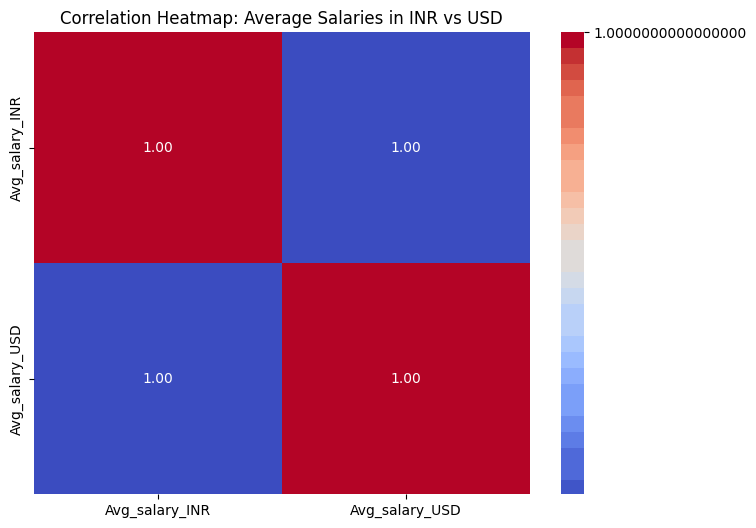

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['Avg_salary_INR', 'Avg_salary_USD']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Average Salaries in INR vs USD')
plt.show()

In [ ]:
# Creating a subset of the dataframe to have only numerical values
mask_numeric = df.dtypes == float
df_numerical = df.loc[:, mask_numeric]

df_numerical.head(0)

Empty DataFrame
Columns: [Ratings, Total_reviews, Interviews_taken, Total_jobs_available, Total_benefits, Avg_salary_USD, Avg_salary_INR]
Index: []

In [ ]:
df_numerical.isna().sum()

Ratings                    0
Total_reviews              0
Interviews_taken         219
Total_jobs_available    3923
Total_benefits            79
Avg_salary_USD             2
Avg_salary_INR             2
dtype: int64

In [ ]:
df.isna().sum()

Company_name               0
Description                0
Ratings                    0
Highly_rated_for          92
Total_reviews              0
Interviews_taken         219
Total_jobs_available    3923
Total_benefits            79
Avg_salary_USD             2
Avg_salary_INR             2
dtype: int64

In [ ]:
df.shape

(10000, 10)

In [ ]:
df[df.isnull().values.any(axis=1)]

Company_name  \
61      Jana Small Finance Bank   
64                  Indian Army   
73             L&T Construction   
125             Ekart Logistics   
132     L&T Technology Services   
...                         ...   
9989    Sunstar Precision Forge   
9990  Terminal Technologies (i)   
9991                Simon India   
9992                   Volvo IT   
9993       Modern Public School   

                                            Description  Ratings  \
61    Banking | 10k-50k Employees | Public | 18 year...      3.9   
64    Defence & Aerospace | 1 Lakh+ Employees | Publ...      4.7   
73    Engineering & Construction | 5k-10k Employees ...      4.0   
125   Logistics | 1k-5k Employees | 15 years old | S...      4.1   
132   IT Services & Consulting | 10k-50k Employees |...      3.4   
...                                                 ...      ...   
9989  Auto Components | 19 years old | Greater Noida...      4.1   
9990  Telecom | 201-500 Employees | 31 years old | V...      4.2   
9991  Oil & Gas | 51-200 Employees | 21 years old | ...      3.6   
9992  Automobile | 1k-5k Employees | 97 years old | ...      3.8   
9993  Education & Training | 5k-10k Employees | 50 y...      4.2   

                                       Highly_rated_for  Total_reviews  \
61                                                  NaN         5600.0   
64     Job Security, Company Culture, Work Satisfaction         5400.0   
73    Job Security, Skill Development / Learning, Sa...         5100.0   
125   Skill Development / Learning, Salary & Benefit...         3600.0   
132   Promotions / Appraisal, Salary & Benefits, Wor...         3500.0   
...                                                 ...            ...   
9989  Company Culture, Skill Development / Learning,...        72000.0   
9990  Skill Development / Learning, Job Security, Wo...        72000.0   
9991  Job Security, Skill Development / Learning, Pr...        72000.0   
9992   Job Security, Work Life Balance, Company Culture        72000.0   
9993  Work Life Balance, Work Satisfaction, Company ...        72000.0   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
61            178000.0               72000.0        620000.0           183.6   
64            124000.0                   NaN        760000.0           116.4   
73            466000.0                   NaN        824000.0           170.4   
125           205000.0                   NaN        365000.0           103.2   
132           281000.0                   NaN        460000.0           386.4   
...                ...                   ...             ...             ...   
9989            1000.0                   NaN          3000.0          4152.0   
9990            4000.0                   NaN          8000.0          4848.0   
9991            1000.0                   NaN          6000.0          5520.0   
9992            1000.0                   NaN         15000.0         10944.0   
9993            4000.0                   NaN         11000.0          4332.0   

      Avg_salary_INR  
61           15300.0  
64            9700.0  
73           14200.0  
125           8600.0  
132          32200.0  
...              ...  
9989        346000.0  
9990        404000.0  
9991        460000.0  
9992        912000.0  
9993        361000.0  

[4069 rows x 10 columns]

In [ ]:
df["Highly_rated_for"][0]

'Job Security, Work Life Balance'

In [ ]:
df['Highly_rated_for'].fillna('nan', inplace = True)

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(5993, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5993 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          5993 non-null   object 
 1   Description           5993 non-null   object 
 2   Ratings               5993 non-null   float64
 3   Highly_rated_for      5993 non-null   object 
 4   Total_reviews         5993 non-null   float64
 5   Interviews_taken      5993 non-null   float64
 6   Total_jobs_available  5993 non-null   float64
 7   Total_benefits        5993 non-null   float64
 8   Avg_salary_USD        5993 non-null   float64
 9   Avg_salary_INR        5993 non-null   float64
dtypes: float64(7), object(3)
memory usage: 515.0+ KB


In [ ]:
df.isnull().sum()

Company_name            0
Description             0
Ratings                 0
Highly_rated_for        0
Total_reviews           0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
Avg_salary_USD          0
Avg_salary_INR          0
dtype: int64

In [ ]:
description_expanded = df['Description'].str.split(' \| ', expand=True)


expected_columns = ['Sector', 'Employees_Range', 'Public/Private', 'Years_Old', 'Location']

for i in range(len(expected_columns)):
    if i >= len(description_expanded.columns):
        description_expanded[i] = np.nan

description_expanded.columns = expected_columns[:len(description_expanded.columns)]


df = pd.concat([df.drop('Description', axis=1), description_expanded], axis=1)

In [ ]:
df.T

0     \
Company_name                                      TCS   
Ratings                                           3.8   
Highly_rated_for      Job Security, Work Life Balance   
Total_reviews                                 73100.0   
Interviews_taken                               6100.0   
Total_jobs_available                         847000.0   
Total_benefits                                11500.0   
Avg_salary_USD                                10282.8   
Avg_salary_INR                               856900.0   
Sector                       IT Services & Consulting   
Employees_Range                     1 Lakh+ Employees   
Public/Private                                 Public   
Years_Old                                56 years old   
Location                             Mumbai +339 more   

                                                                   1     \
Company_name                                                  Accenture   
Ratings                                                             4.0   
Highly_rated_for      Company Culture, Skill Development / Learning,...   
Total_reviews                                                   46400.0   
Interviews_taken                                                 4300.0   
Total_jobs_available                                             9900.0   
Total_benefits                                                   7100.0   
Avg_salary_USD                                                   7015.2   
Avg_salary_INR                                                 584600.0   
Sector                                         IT Services & Consulting   
Employees_Range                                       1 Lakh+ Employees   
Public/Private                                                   Public   
Years_Old                                                  35 years old   
Location                                               Dublin +173 more   

                                                2     \
Company_name                               Cognizant   
Ratings                                          3.9   
Highly_rated_for        Skill Development / Learning   
Total_reviews                                41700.0   
Interviews_taken                              3600.0   
Total_jobs_available                        460000.0   
Total_benefits                                5800.0   
Avg_salary_USD                                6738.0   
Avg_salary_INR                              561500.0   
Sector                      IT Services & Consulting   
Employees_Range                    1 Lakh+ Employees   
Public/Private                    Forbes Global 2000   
Years_Old                               30 years old   
Location              Teaneck. New Jersey. +156 more   

                                               3     \
Company_name                                  Wipro   
Ratings                                         3.8   
Highly_rated_for                       Job Security   
Total_reviews                               39200.0   
Interviews_taken                             3700.0   
Total_jobs_available                       405000.0   
Total_benefits                               5000.0   
Avg_salary_USD                               5128.8   
Avg_salary_INR                             427400.0   
Sector                     IT Services & Consulting   
Employees_Range                   1 Lakh+ Employees   
Public/Private                               Public   
Years_Old                              79 years old   
Location              Bangalore/Bengaluru +276 more   

                                                                   4     \
Company_name                                                  Capgemini   
Ratings                                                             3.9   
Highly_rated_for      Job Security, Work Life Balance, Skill Develop...   
Total_reviews                                                   34000.0   
Interviews_taken         

In [ ]:
# Display the original DataFrame
print("Original DataFrame:")
df

# Perform the required operations
mask_location_none = df['Location'].isnull()
mask_public_private_none = df['Public/Private'].isnull()

# Swap values between 'Location' and 'Years_old' when 'Location' is None
df.loc[mask_location_none, ['Location', 'Years_Old']] = df.loc[mask_location_none, ['Public/Private', 'Years_Old']].values

# Swap values between 'Public/Private' and 'Years_old' when 'Public/Private' is None
df.loc[mask_public_private_none, ['Public/Private', 'Years_Old']] = df.loc[mask_public_private_none, ['Years_Old', 'Public/Private']].values

# Set 'Public/Private' to 'nan'
df.loc[mask_location_none | mask_public_private_none, 'Public/Private'] = np.nan

# Display the updated DataFrame
print("\nUpdated DataFrame:")
df

Original DataFrame:

Updated DataFrame:


Company_name  Ratings  \
0                               TCS      3.8   
1                         Accenture      4.0   
2                         Cognizant      3.9   
3                             Wipro      3.8   
4                         Capgemini      3.9   
...                             ...      ...   
9995        Techila Global Services      3.7   
9996            RxLogix Corporation      2.6   
9997  Avians Innovations Technology      3.7   
9998                   ACPL Systems      3.3   
9999                      Beroe Inc      4.5   

                                       Highly_rated_for  Total_reviews  \
0                       Job Security, Work Life Balance        73100.0   
1     Company Culture, Skill Development / Learning,...        46400.0   
2                          Skill Development / Learning        41700.0   
3                                          Job Security        39200.0   
4     Job Security, Work Life Balance, Skill Develop...        34000.0   
...                                                 ...            ...   
9995  Work Life Balance, Salary & Benefits, Company ...        72000.0   
9996  Work Life Balance, Work Satisfaction, Company ...        72000.0   
9997  Promotions / Appraisal, Work Satisfaction, Sal...        72000.0   
9998  Promotions / Appraisal, Salary & Benefits, Wor...        72000.0   
9999   Work Life Balance, Job Security, Company Culture        72000.0   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0               6100.0              847000.0         11500.0         10282.8   
1               4300.0                9900.0          7100.0          7015.2   
2               3600.0              460000.0          5800.0          6738.0   
3               3700.0              405000.0          5000.0          5128.8   
4               2800.0              719000.0          4000.0          4972.8   
...                ...                   ...             ...             ...   
9995            2000.0               26000.0         21000.0          5448.0   
9996           15000.0                9000.0         13000.0          9588.0   
9997            3000.0               11000.0          8000.0          5868.0   
9998            4000.0                1000.0         10000.0          6240.0   
9999            7000.0                5000.0         14000.0          7020.0   

      Avg_salary_INR                      Sector    Employees_Range  \
0           856900.0    IT Services & Consulting  1 Lakh+ Employees   
1           584600.0    IT Services & Consulting  1 Lakh+ Employees   
2           561500.0    IT Services & Consulting  1 Lakh+ Employees   
3           427400.0    IT Services & Consulting  1 Lakh+ Employees   
4           414400.0    IT Services & Consulting  1 Lakh+ Employees   
...              ...                         ...                ...   
9995        454000.0    IT Services & Consulting   501-1k Employees   
9996        799000.0                      Pharma  201-500 Employees   
9997        489000.0           Building Material   51-200 Employees   
9998        520000.0  Law Enforcement & Security   51-200 Employees   
9999        585000.0       Management Consulting  201-500 Employees   

          Public/Private           Years_Old                        Location  
0                 Public        56 years old                Mumbai +339 more  
1                 Public        35 years old                Dublin +173 more  
2     Forbes Global 2000        30 years old  Teaneck. New Jersey. +156 more  
3                 Public        79 years old   Bangalore/Bengaluru +276 more  
4                 Public        57 years old                 Paris +139 more  
...                  ...                 ...                             ...  
9995                 NaN  Boca Raton +4 more                    12 years old  
9996                 NaN   Princeton +4 more                    14 years old  
9997                 NaN        

In [ ]:
num_features = ['Avg_salary_USD', 'Avg_salary_INR', 'Total_reviews', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']
df[num_features] = df[num_features].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5993 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          5993 non-null   object 
 1   Ratings               5993 non-null   float64
 2   Highly_rated_for      5993 non-null   object 
 3   Total_reviews         5993 non-null   int64  
 4   Interviews_taken      5993 non-null   int64  
 5   Total_jobs_available  5993 non-null   int64  
 6   Total_benefits        5993 non-null   int64  
 7   Avg_salary_USD        5993 non-null   int64  
 8   Avg_salary_INR        5993 non-null   int64  
 9   Sector                5993 non-null   object 
 10  Employees_Range       5949 non-null   object 
 11  Public/Private        1823 non-null   object 
 12  Years_Old             5621 non-null   object 
 13  Location              5881 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 831.3+ KB


In [ ]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Identify rows where 'Location' contains 'years old'
mask_location_years_old = df['Location'].str.contains('years old', na=False)

# Swap values between 'Location' and 'Years_Old'
df.loc[mask_location_years_old, ['Location', 'Years_Old']] = df.loc[mask_location_years_old, ['Years_Old', 'Location']].values

# Display the updated DataFrame
print("\nUpdated DataFrame:")
df

Original DataFrame:
                       Company_name  Ratings  \
0                               TCS      3.8   
1                         Accenture      4.0   
2                         Cognizant      3.9   
3                             Wipro      3.8   
4                         Capgemini      3.9   
...                             ...      ...   
9995        Techila Global Services      3.7   
9996            RxLogix Corporation      2.6   
9997  Avians Innovations Technology      3.7   
9998                   ACPL Systems      3.3   
9999                      Beroe Inc      4.5   

                                       Highly_rated_for  Total_reviews  \
0                       Job Security, Work Life Balance          73100   
1     Company Culture, Skill Development / Learning,...          46400   
2                          Skill Development / Learning          41700   
3                                          Job Security          39200   
4     Job Security, Work Life Bal

Company_name  Ratings  \
0                               TCS      3.8   
1                         Accenture      4.0   
2                         Cognizant      3.9   
3                             Wipro      3.8   
4                         Capgemini      3.9   
...                             ...      ...   
9995        Techila Global Services      3.7   
9996            RxLogix Corporation      2.6   
9997  Avians Innovations Technology      3.7   
9998                   ACPL Systems      3.3   
9999                      Beroe Inc      4.5   

                                       Highly_rated_for  Total_reviews  \
0                       Job Security, Work Life Balance          73100   
1     Company Culture, Skill Development / Learning,...          46400   
2                          Skill Development / Learning          41700   
3                                          Job Security          39200   
4     Job Security, Work Life Balance, Skill Develop...          34000   
...                                                 ...            ...   
9995  Work Life Balance, Salary & Benefits, Company ...          72000   
9996  Work Life Balance, Work Satisfaction, Company ...          72000   
9997  Promotions / Appraisal, Work Satisfaction, Sal...          72000   
9998  Promotions / Appraisal, Salary & Benefits, Wor...          72000   
9999   Work Life Balance, Job Security, Company Culture          72000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0                 6100                847000           11500           10282   
1                 4300                  9900            7100            7015   
2                 3600                460000            5800            6738   
3                 3700                405000            5000            5128   
4                 2800                719000            4000            4972   
...                ...                   ...             ...             ...   
9995              2000                 26000           21000            5448   
9996             15000                  9000           13000            9588   
9997              3000                 11000            8000            5868   
9998              4000                  1000           10000            6240   
9999              7000                  5000           14000            7020   

      Avg_salary_INR                      Sector    Employees_Range  \
0             856900    IT Services & Consulting  1 Lakh+ Employees   
1             584600    IT Services & Consulting  1 Lakh+ Employees   
2             561500    IT Services & Consulting  1 Lakh+ Employees   
3             427400    IT Services & Consulting  1 Lakh+ Employees   
4             414400    IT Services & Consulting  1 Lakh+ Employees   
...              ...                         ...                ...   
9995          454000    IT Services & Consulting   501-1k Employees   
9996          799000                      Pharma  201-500 Employees   
9997          489000           Building Material   51-200 Employees   
9998          520000  Law Enforcement & Security   51-200 Employees   
9999          585000       Management Consulting  201-500 Employees   

          Public/Private     Years_Old                        Location  
0                 Public  56 years old                Mumbai +339 more  
1                 Public  35 years old                Dublin +173 more  
2     Forbes Global 2000  30 years old  Teaneck. New Jersey. +156 more  
3                 Public  79 years old   Bangalore/Bengaluru +276 more  
4                 Public  57 years old                 Paris +139 more  
...                  ...           ...                             ...  
9995                 NaN  12 years old              Boca Raton +4 more  
9996                 NaN  14 years old               Princeton +4 more  
9997                 NaN  17 years old                    Pune +7 more  
9998         

In [ ]:
rows_to_swap = df[df['Sector'].str.contains('Employees', case=False)]

# Swap the values between "Sector" and "Employees_Range" columns
df.loc[rows_to_swap.index, ['Sector', 'Employees_Range']] = df.loc[rows_to_swap.index, ['Employees_Range', 'Sector']].values

df.head()

Company_name  Ratings                                   Highly_rated_for  \
0          TCS      3.8                    Job Security, Work Life Balance   
1    Accenture      4.0  Company Culture, Skill Development / Learning,...   
2    Cognizant      3.9                       Skill Development / Learning   
3        Wipro      3.8                                       Job Security   
4    Capgemini      3.9  Job Security, Work Life Balance, Skill Develop...   

   Total_reviews  Interviews_taken  Total_jobs_available  Total_benefits  \
0          73100              6100                847000           11500   
1          46400              4300                  9900            7100   
2          41700              3600                460000            5800   
3          39200              3700                405000            5000   
4          34000              2800                719000            4000   

   Avg_salary_USD  Avg_salary_INR                    Sector  \
0           10282          856900  IT Services & Consulting   
1            7015          584600  IT Services & Consulting   
2            6738          561500  IT Services & Consulting   
3            5128          427400  IT Services & Consulting   
4            4972          414400  IT Services & Consulting   

     Employees_Range      Public/Private     Years_Old  \
0  1 Lakh+ Employees              Public  56 years old   
1  1 Lakh+ Employees              Public  35 years old   
2  1 Lakh+ Employees  Forbes Global 2000  30 years old   
3  1 Lakh+ Employees              Public  79 years old   
4  1 Lakh+ Employees              Public  57 years old   

                         Location  
0                Mumbai +339 more  
1                Dublin +173 more  
2  Teaneck. New Jersey. +156 more  
3   Bangalore/Bengaluru +276 more  
4                 Paris +139 more

In [ ]:
df.drop('Public/Private', axis = 1, inplace = True)

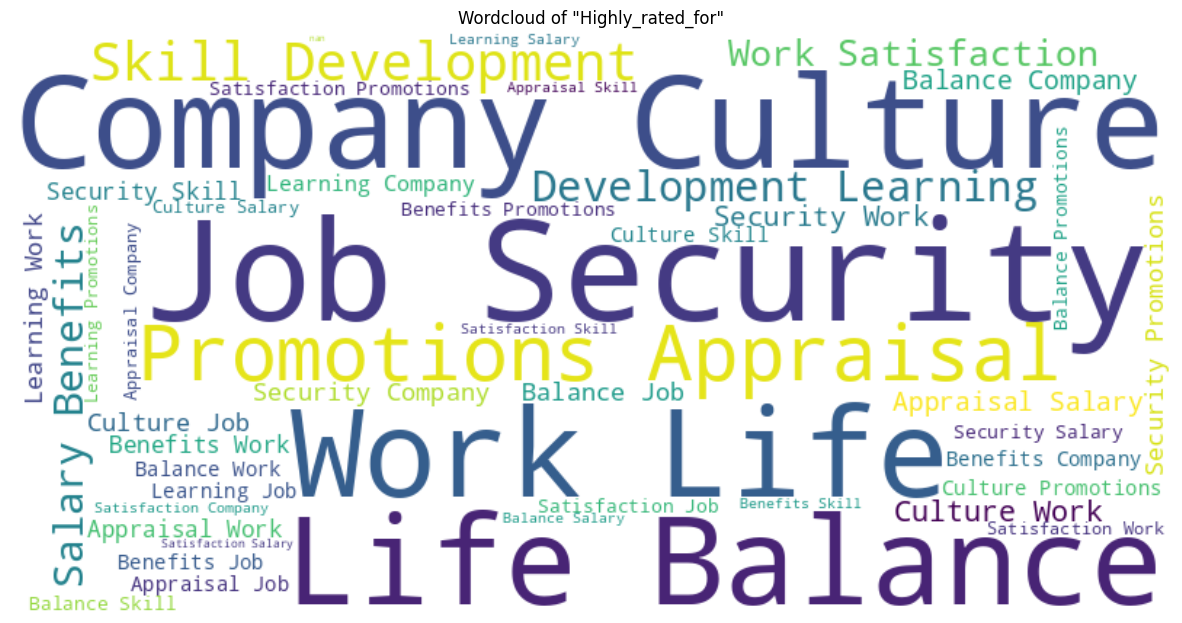

In [ ]:
from wordcloud import WordCloud

all_texts = ' '.join(df['Highly_rated_for'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_texts)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of "Highly_rated_for"')
plt.show()

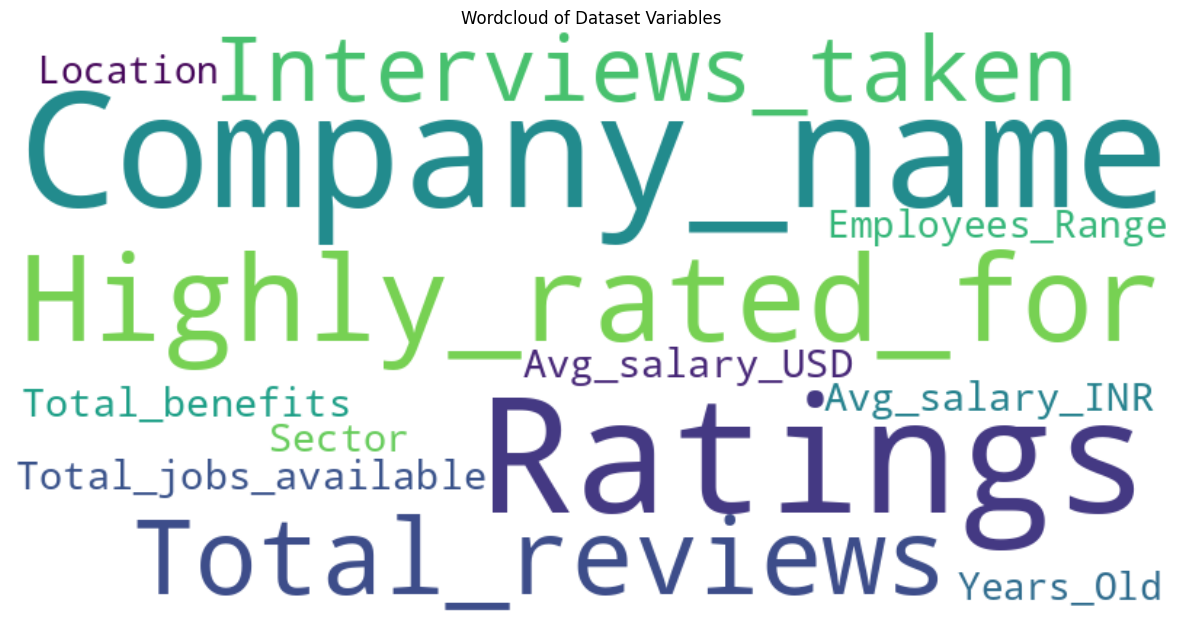

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
variable_names = df.columns.tolist()
text = ' '.join(variable_names)

# Generate WordCloud with collocations=False
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

# Define a colormap with shades of blue
cmap = LinearSegmentedColormap.from_list('lighter_shades_of_blue', ['#a6cee3', '#ccecec', '#e5f5f9', '#f0f8ff', '#f5fbff'])

# Display the WordCloud with the specified colormap
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear', cmap=cmap)
plt.axis('off')
plt.title('Wordcloud of Dataset Variables')
plt.show()


In [ ]:
df.shape

(5993, 13)

# Descriptive Analysis

In [ ]:
df[['Total_reviews', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits', 'Total_reviews', 'Avg_salary_USD', 'Avg_salary_INR', 'Ratings']].skew()

Total_reviews           1.760472
Interviews_taken        6.911399
Total_jobs_available    6.759537
Total_benefits          4.434859
Total_reviews           1.760472
Avg_salary_USD          0.550358
Avg_salary_INR          0.550399
Ratings                -0.635947
dtype: float64

In [ ]:
df['Ratings'] = df['Ratings'].astype(int)

# Display the data types to verify the conversion
df.dtypes

Company_name            object
Ratings                  int64
Highly_rated_for        object
Total_reviews            int64
Interviews_taken         int64
Total_jobs_available     int64
Total_benefits           int64
Avg_salary_USD           int64
Avg_salary_INR           int64
Sector                  object
Employees_Range         object
Years_Old               object
Location                object
dtype: object

In [ ]:
df.describe()

Ratings  Total_reviews  Interviews_taken  Total_jobs_available  \
count  5993.00000    5993.000000       5993.000000           5993.000000   
mean      3.41465  209475.905223      26935.191056          28715.651594   
std       0.53117  195130.816516      58299.270933          68014.023249   
min       1.00000    1000.000000       1000.000000           1000.000000   
25%       3.00000   89000.000000       5000.000000           3000.000000   
50%       3.00000  138000.000000      10000.000000           9000.000000   
75%       4.00000  266000.000000      23000.000000          26000.000000   
max       5.00000  999000.000000     972000.000000         981000.000000   

       Total_benefits  Avg_salary_USD  Avg_salary_INR  
count     5993.000000     5993.000000     5993.000000  
mean     54540.714167     3603.245620   300285.883197  
std      98801.631114     3958.831127   329888.889828  
min       1000.000000       12.000000     1000.000000  
25%      12000.000000       26.000000     2200.000000  
50%      22000.000000     1632.000000   136000.000000  
75%      50000.000000     6984.000000   582000.000000  
max     973000.000000    11976.000000   998000.000000

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

iqr = numerical_columns.quantile(0.75) - numerical_columns.quantile(0.25)

print("IQR for each column:")
iqr

IQR for each column:


Ratings                      1.0
Total_reviews           183000.0
Interviews_taken         19000.0
Total_jobs_available     23000.0
Total_benefits           40000.0
Avg_salary_USD            6935.0
Avg_salary_INR          577900.0
dtype: float64

In [ ]:
df['Company_name']

0                                 TCS
1                           Accenture
2                           Cognizant
3                               Wipro
4                           Capgemini
                    ...              
9995          Techila Global Services
9996              RxLogix Corporation
9997    Avians Innovations Technology
9998                     ACPL Systems
9999                        Beroe Inc
Name: Company_name, Length: 5993, dtype: object

In [ ]:
df['Company_name'].describe()

count                    5993
unique                   5665
top       Biotech Vision Care
freq                        2
Name: Company_name, dtype: object

In [ ]:
df['Highly_rated_for'].describe()

count             5993
unique             244
top       Job Security
freq               282
Name: Highly_rated_for, dtype: object

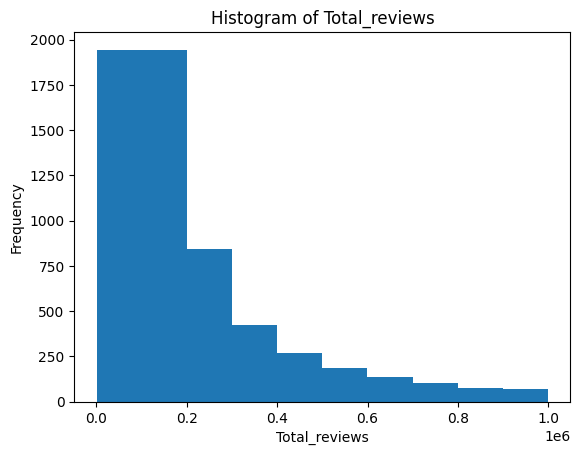

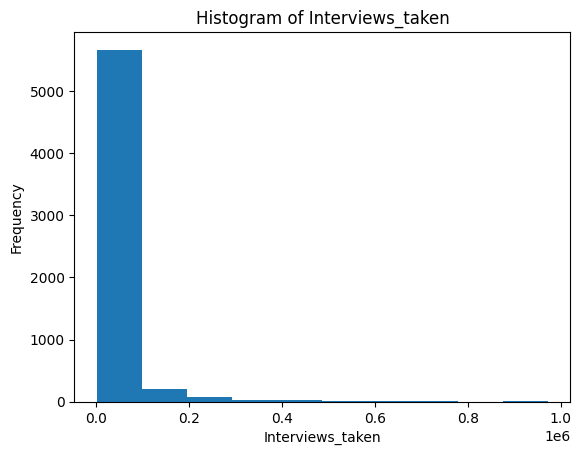

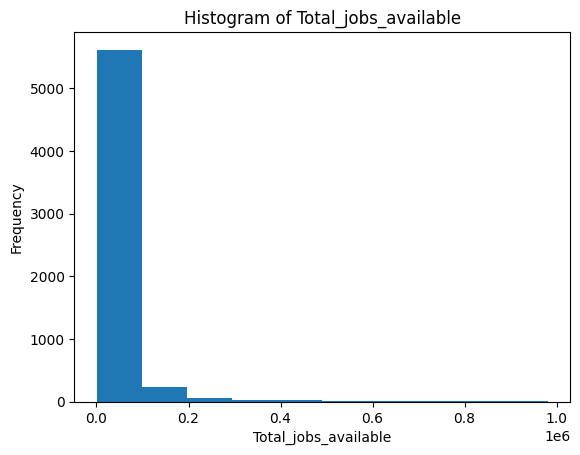

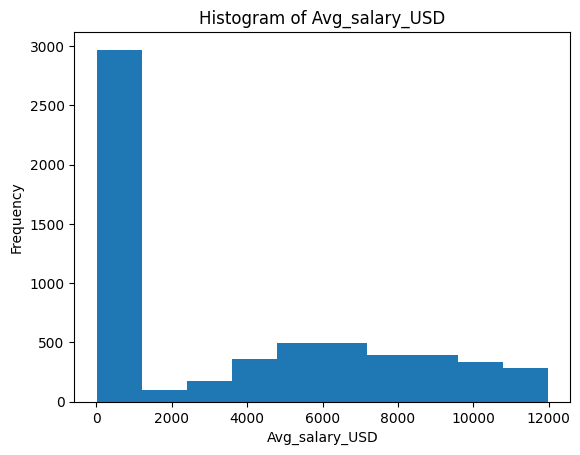

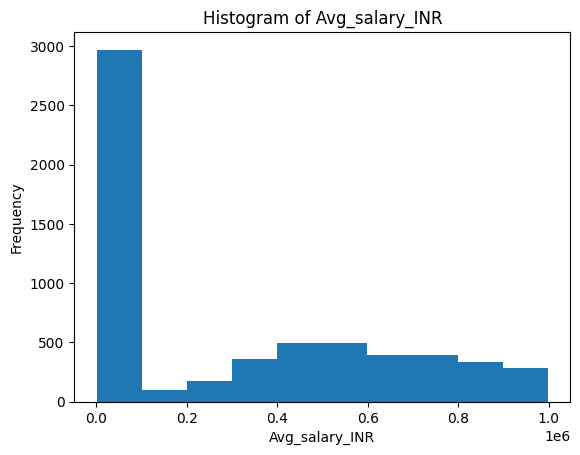

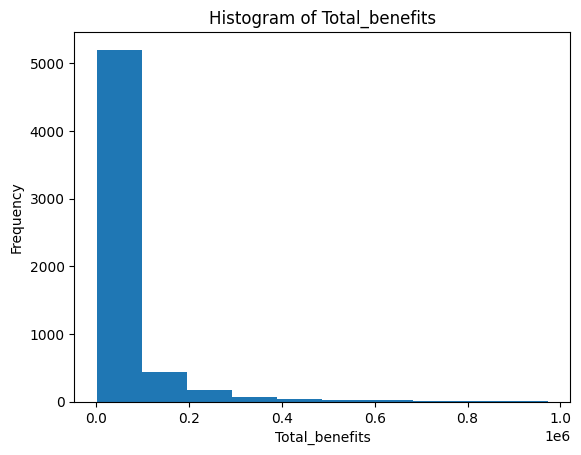

In [ ]:
numeric_features = ['Total_reviews', 'Interviews_taken', 'Total_jobs_available', 'Avg_salary_USD', 'Avg_salary_INR', 'Total_benefits']

# Alternatively, you can visualize individual features using histograms
for feature in numeric_features:
    plt.hist(df[feature], bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df[df.isnull().values.any(axis=1)]

Company_name  Ratings  \
71    Amazon Development Centre India        4   
220          Carelon Global Solutions        4   
285   Bajaj Allianz General Insurance        4   
302             Capgemini Engineering        3   
333                    Nokia Networks        4   
...                               ...      ...   
9916                         Linedata        3   
9919                KEKA TECHNOLOGIES        3   
9922                      HTIC Global        3   
9927        Sterling Gtake E-Mobility        3   
9933                         Linedata        3   

                                       Highly_rated_for  Total_reviews  \
71    Company Culture, Work Life Balance, Salary & B...           5100   
220    Job Security, Salary & Benefits, Company Culture           2400   
285   Skill Development / Learning, Company Culture,...           2100   
302   Promotions / Appraisal, Salary & Benefits, Wor...           2000   
333   Company Culture, Work Life Balance, Work Satis...           1800   
...                                                 ...            ...   
9916                      Company Culture, Job Security          73000   
9919   Job Security, Work Satisfaction, Company Culture          73000   
9922                                  Salary & Benefits          73000   
9927  Promotions / Appraisal, Job Security, Work Sat...          73000   
9933                      Company Culture, Job Security          73000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
71              374000                 34000           54000             301   
220             257000                 27000           50000             268   
285              65000                 32000          247000             102   
302             196000                840000          159000             249   
333              87000                118000           24000              97   
...                ...                   ...             ...             ...   
9916             13000                 21000            5000            8400   
9919             11000                  5000            7000            7812   
9922              2000                  7000           22000            3972   
9927              4000                 12000            9000            2760   
9933             13000                 21000            5000            8400   

      Avg_salary_INR                       Sector    Employees_Range  \
71             25100                     Internet  10k-50k Employees   
220            22400     IT Services & Consulting  10k-50k Employees   
285             8500                    Insurance   5k-10k Employees   
302            20800  Gurgaon / Gurugram +21 more  10k-50k Employees   
333             8100        Hardware & Networking   501-1k Employees   
...              ...                          ...                ...   
9916          700000                     Internet       26 years old   
9919          651000             Software Product   501-1k Employees   
9922          331000                Kochi +3 more  201-500 Employees   
9927          230000              Auto Components   51-200 Employees   
9933          700000                     Internet       26 years old   

     Years_Old                           Location  
71        None  Hyderabad / Secunderabad +79 more  
220       None  Hyderabad / Secunderabad +12 more  
285       None                     Pune +210 more  
302       None                               None  
333       None                   Chennai +83 more  
...        ...                                ...  
9916      None          Neuilly-sur-seine +5 more  
9919      None   Hyderabad / Secunderabad +2 more  
9922      None                               None  
9927      None                  Faridabad +1 more  
9933      None          Neuilly-sur-seine +5 more  

[372 rows x 13 columns]

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(5621, 13)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.shape

(5621, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company_name          5621 non-null   object
 1   Ratings               5621 non-null   int64 
 2   Highly_rated_for      5621 non-null   object
 3   Total_reviews         5621 non-null   int64 
 4   Interviews_taken      5621 non-null   int64 
 5   Total_jobs_available  5621 non-null   int64 
 6   Total_benefits        5621 non-null   int64 
 7   Avg_salary_USD        5621 non-null   int64 
 8   Avg_salary_INR        5621 non-null   int64 
 9   Sector                5621 non-null   object
 10  Employees_Range       5621 non-null   object
 11  Years_Old             5621 non-null   object
 12  Location              5621 non-null   object
dtypes: int64(7), object(6)
memory usage: 571.0+ KB


# Numerical Features

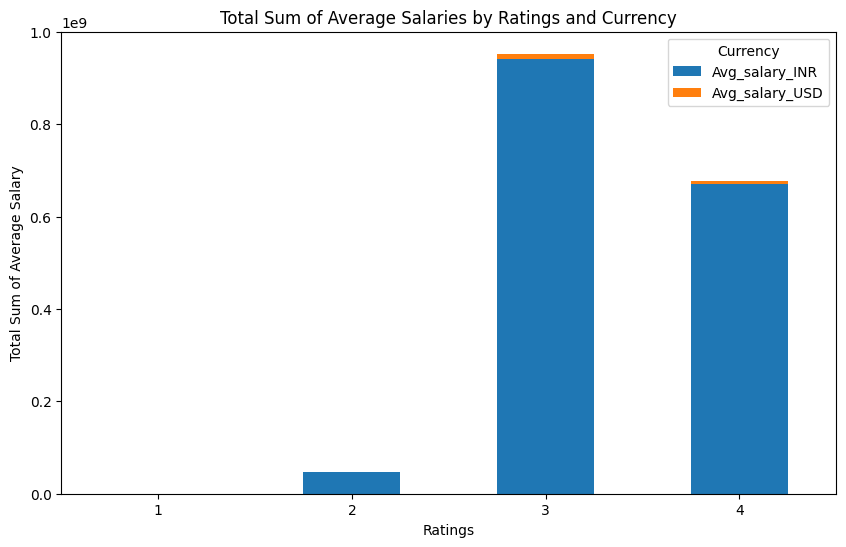

In [ ]:
# Calculate total sum of salaries by rating and currency
total_sum = df.groupby('Ratings').sum()

# Create stacked bar chart
total_sum[['Avg_salary_INR', 'Avg_salary_USD']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sum of Average Salaries by Ratings and Currency')
plt.xlabel('Ratings')
plt.ylabel('Total Sum of Average Salary')
plt.xticks(rotation=0)
plt.legend(title='Currency')
plt.show()

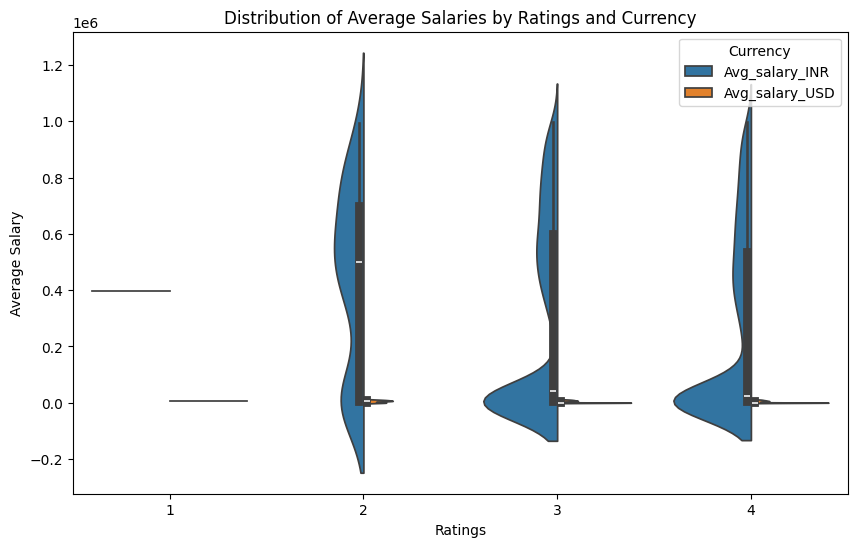

In [ ]:
# Melt DataFrame to long format for plotting
df_melted = pd.melt(df, id_vars=['Ratings'], value_vars=['Avg_salary_INR', 'Avg_salary_USD'], var_name='Currency', value_name='Avg_salary')

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ratings', y='Avg_salary', hue='Currency', data=df_melted, split=True)
plt.title('Distribution of Average Salaries by Ratings and Currency')
plt.xlabel('Ratings')
plt.ylabel('Average Salary')
plt.legend(title='Currency', loc='upper right')
plt.show()

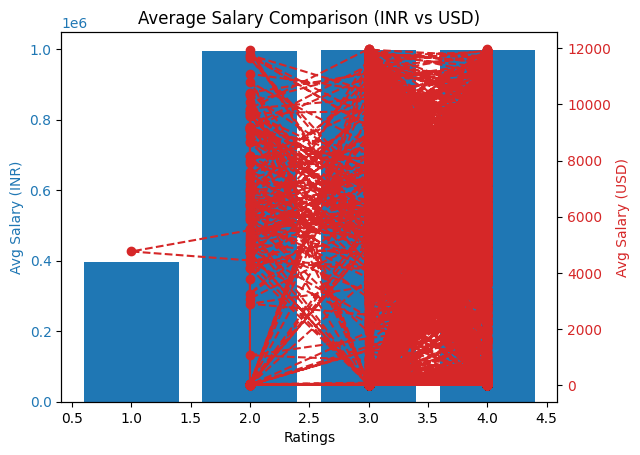

In [ ]:
# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot average salary in Indian Rupees on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Avg Salary (INR)', color=color)
ax1.bar(df['Ratings'], df['Avg_salary_INR'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis and plot average salary in US Dollars on it
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Salary (USD)', color=color)
ax2.plot(df['Ratings'], df['Avg_salary_USD'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show plot
plt.title('Average Salary Comparison (INR vs USD)')
plt.show()


Text(0.5, 1.0, 'Average Salary rated over ratings')

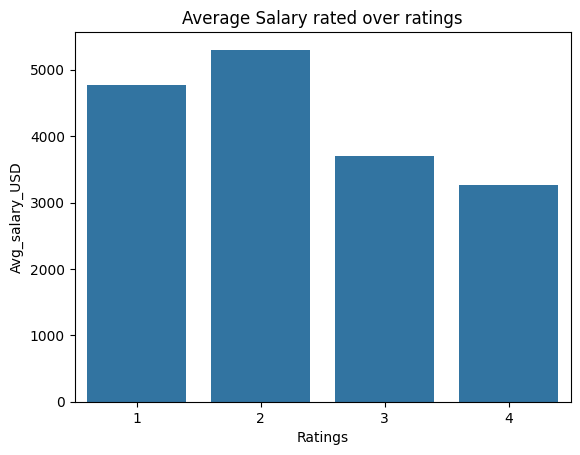

In [ ]:
p = sns.barplot(x = 'Ratings', y = 'Avg_salary_USD', data = df, ci = None)
p.set_title('Average Salary rated over ratings')

The highest averages receive a lower than 5 rating. This means that average salary might not play a huge role in the company's overall rating.

Text(0.5, 1.0, 'Total Benefits over Ratings')

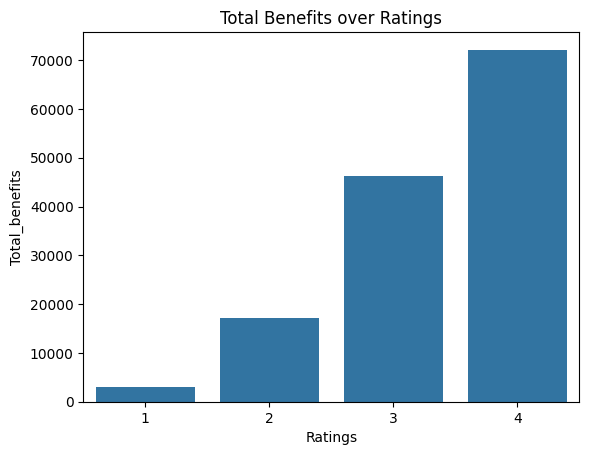

In [ ]:
p = sns.barplot(x = 'Ratings', y = 'Total_benefits', data = df, ci = None)
p.set_title('Total Benefits over Ratings')

More benefits does equate to a higher rating. Big difference between 20 benefits and 50 benefits.

Text(0.5, 1.0, 'Total Reviews over Ratings')

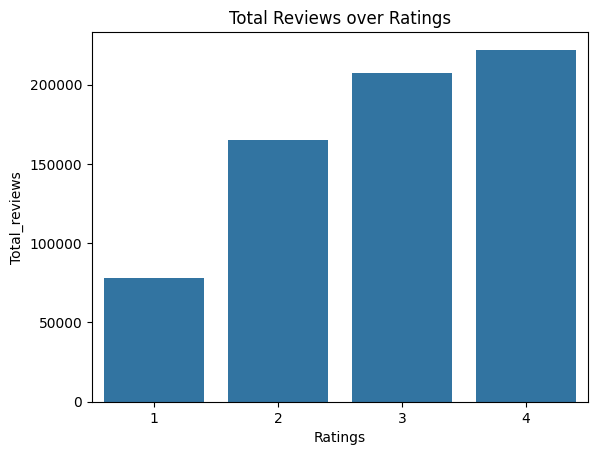

In [ ]:
p = sns.barplot(x = 'Ratings', y = 'Total_reviews', data = df, ci = None)
p.set_title('Total Reviews over Ratings')

Text(0.5, 1.0, 'Total Ratings over Average Salary')

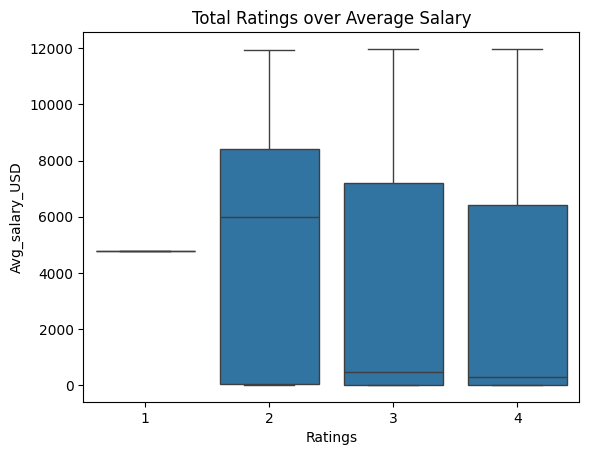

In [ ]:
p = sns.boxplot(x = 'Ratings', y = 'Avg_salary_USD', data = df)
p.set_title('Total Ratings over Average Salary')

All the average salary means are similar to each other except the rating of 5 has a signifcantly lower mean. There are also three outliers in rating 5, so that might be something to consider.

Text(0.5, 1.0, 'Average Salary over Ratings')

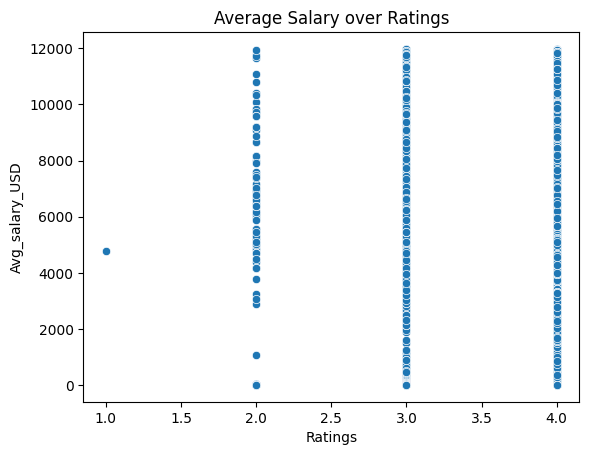

In [ ]:
p = sns.scatterplot(x = 'Ratings', y = 'Avg_salary_USD', data = df)
p.set_title('Average Salary over Ratings')

Again, more likely for higher average salary to rate a 3 or 4. Lower average salaries votes all ratings.

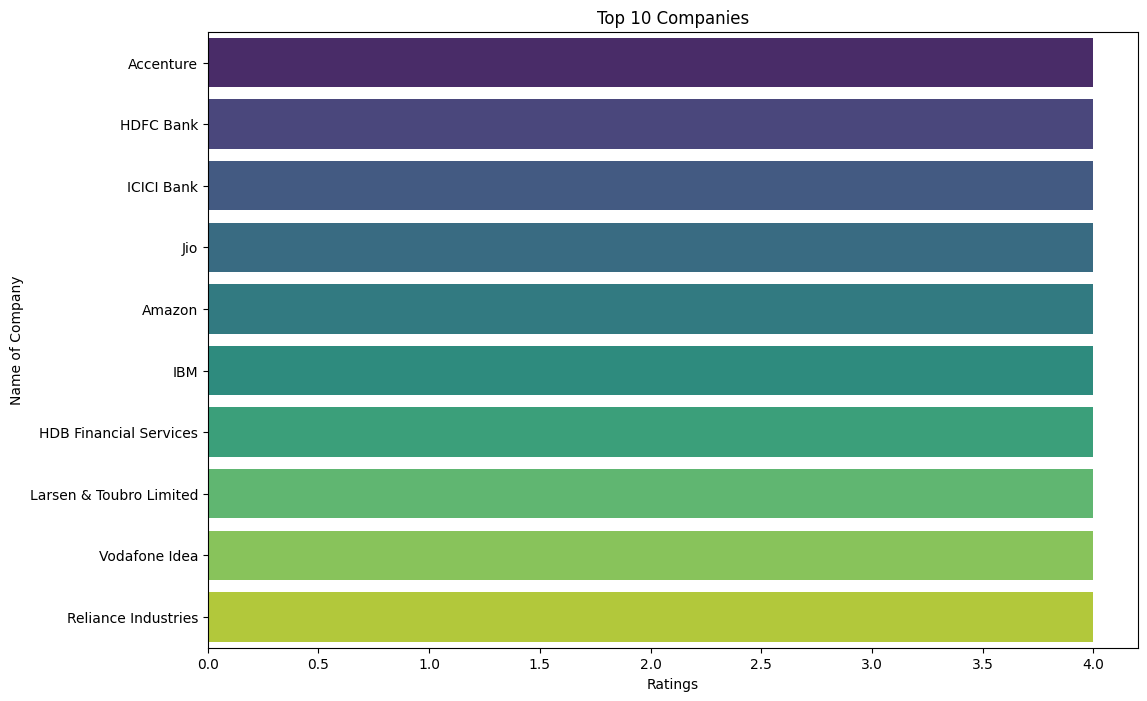

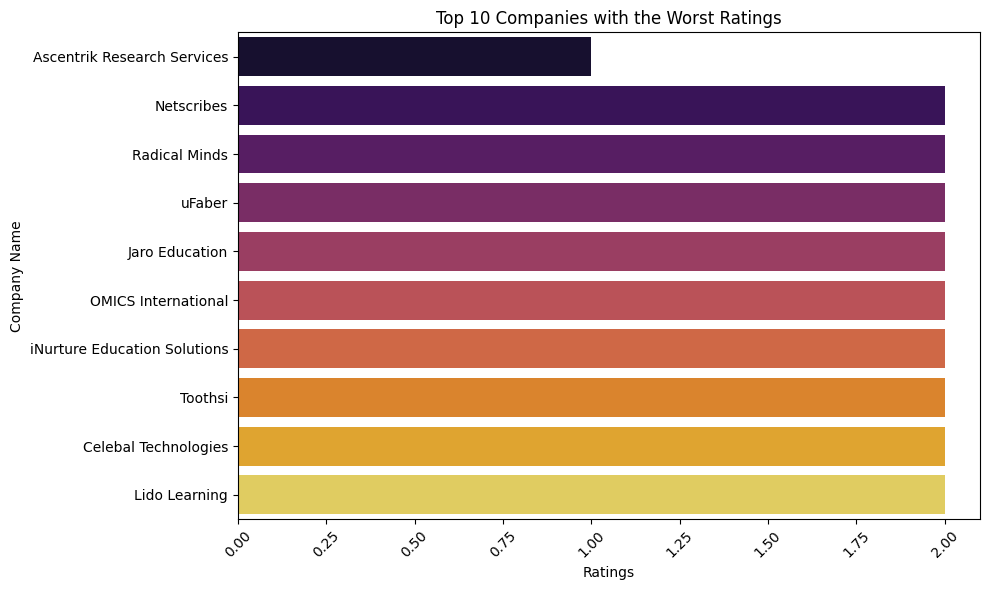

In [ ]:
top_rated_companies = df.nlargest(10, 'Ratings')
plt.figure(figsize=(12, 8))
sns.barplot(x='Ratings', y='Company_name', data=top_rated_companies, palette='viridis')
plt.title('Top 10 Companies')
plt.xlabel('Ratings')
plt.ylabel('Name of Company')
plt.show()

bottom_companies = df.nsmallest(10, 'Ratings')

# Then, create a bar plot to visualize the companies with the worst ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ratings', y='Company_name', data=bottom_companies, palette='inferno')
plt.title('Top 10 Companies with the Worst Ratings')
plt.xlabel('Ratings')
plt.ylabel('Company Name')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Feature Selection
# Select relevant features for clustering
X = df[['Avg_salary', 'Total_benefits']]

KeyError: "['Avg_salary'] not in index"

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Initialize list to store the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []

# Define range of clusters to try
max_clusters = 10  # Maximum number of clusters to try
for i in range(1, max_clusters + 1):
    # Fit KMeans clustering algorithm for different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)  # Assuming df_features contains the features used for clustering
    # Append WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

Using the elbow method to determine the best number of clusters.

In [ ]:
num_clusters = 2
# Initialize KMeans clustering algorithm with the num_clusters
kmeans = KMeans(n_clusters= num_clusters, init='k-means++', random_state=42)

# Fit the KMeans model to your data
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

In [ ]:
# Ensure that the length of cluster labels matches the number of rows in the DataFrame
if len(cluster_labels) == df.shape[0]:
    # Assign cluster labels to the DataFrame
    df['Cluster'] = cluster_labels
    print("Clustering successful!")
else:
    print("Error: Length of cluster labels does not match length of DataFrame")

In [ ]:
# Cluster profiling: Calculate cluster means
cluster_means = df.groupby('Cluster').mean()
print("Cluster Means:")
cluster_means

The mean for Rating is similar despite all the other means.

In [ ]:
for feature in X:
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} across clusters')
    plt.show()

 Cluster 0 has the lowest total benefits with many outliers to consider. Cluster 1 has the highest amount of total benefits, as well as outliers.

In [ ]:
# Compare means of features across clusters
from scipy.stats import f_oneway

for feature in X:
    f_statistic, p_value = f_oneway(*[df[df['Cluster'] == i][feature] for i in range(num_clusters)])
    print(f"Feature: {feature}, F-statistic: {f_statistic}, p-value: {p_value}")

 This suggests that there are significant differences in average salaries and total benefits across different groups.

In [ ]:
# Interpret the clusters based on feature values
for i in range(num_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe())

In [ ]:
y = df['Cluster']
# Train a predictive model using cluster labels as target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

This code trains a logistic regression model to predict the cluster labels based on the input features (X) and evaluates its performance by calculating the accuracy of the predictions on the test data.

In [ ]:
X

In [ ]:
X.describe()

In [ ]:
# EDA within each cluster
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]

    # Plot histograms or KDE plots for numeric features
    numeric_features = ['Avg_salary', 'Total_benefits', 'Ratings']
    for feature in numeric_features:
        plt.figure(figsize=(5, 3))
        sns.histplot(cluster_data[feature], kde=True)
        plt.title(f'Distribution of {feature} in Cluster {cluster_label}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# Define numeric features
numeric_features = ['Avg_salary', 'Total_benefits', 'Ratings']

# Create subplots for each numeric feature
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 8), sharex=True)

# Plot distributions for each numeric feature using violin plots
for i, feature in enumerate(numeric_features):
    sns.violinplot(data=df, x='Cluster', y=feature, ax=axes[i], palette='husl')
    axes[i].set_title(f'Distribution of {feature} across Clusters')
    axes[i].set_ylabel(feature)

# Set common x-label
axes[-1].set_xlabel('Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

Total benefits and average salary do not seem to have a significant effect on the companies rating.

In [ ]:
# Extract relevant columns for analysis
relevant_columns = ['Ratings', 'Total_reviews', 'Avg_salary', 'Total_jobs_available'] + list(df_concatenated.columns[df_concatenated.columns.str.startswith('Highly_rated_for_')]) + ['Cluster']
df_analysis = df_concatenated[relevant_columns]

# Grouping by Cluster
cluster_groups = df_analysis.groupby('Cluster')

# Visualize the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_analysis)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# Concatenate dataframes for each cluster
cluster_dfs = [group_df[highly_rated_columns].sum() for _, group_df in df_concatenated.groupby('Cluster')]
cluster_labels = [f'Cluster {i}' for i in range(len(cluster_dfs))]

# Concatenate the dataframes vertically
df_concatenated_clusters = pd.concat(cluster_dfs, axis=1, keys=cluster_labels)

# Reset index to make 'index' a column
df_concatenated_clusters.reset_index(inplace=True)

# Melt the dataframe to long format for seaborn barplot
df_melted = pd.melt(df_concatenated_clusters, id_vars='index', var_name='Highly Rated Categories', value_name='Count')

# Plot the barplot with hue representing clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='Highly Rated Categories', y='Count', hue='index', data=df_melted, palette='husl')
plt.title('Distribution of Highly Rated Categories in Clusters')
plt.xlabel('Highly Rated Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Define numeric features
numeric_features = ['Avg_salary', 'Total_benefits']

# Create subplots for each numeric feature
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 8), sharex=True)

# Plot density plots for each numeric feature
for i, feature in enumerate(numeric_features):
    for cluster_label, cluster_data in df.groupby('Cluster'):
        sns.kdeplot(data=cluster_data[feature], label=f'Cluster {cluster_label}', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} across Clusters')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Set common x-label
axes[-1].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Define numeric features
numeric_features = ['Avg_salary_USD', 'Total_benefits']

# Create subplots for each numeric feature
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 8), sharex=True)

# Plot outliers for each numeric feature
for i, feature in enumerate(numeric_features):
    outliers = []
    for cluster_label, cluster_data in df.groupby('Cluster'):
        q1 = cluster_data[feature].quantile(0.25)
        q3 = cluster_data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cluster_outliers = cluster_data[(cluster_data[feature] < lower_bound) | (cluster_data[feature] > upper_bound)]
        outliers.append(cluster_outliers)

    # Concatenate outliers for all clusters
    all_outliers = pd.concat(outliers)

    # Plot outliers
    scatter = sns.scatterplot(data=all_outliers, x='Cluster', y=feature, ax=axes[i], hue='Cluster', palette='husl', legend='full')
    handles, labels = scatter.get_legend_handles_labels()

    axes[i].set_title(f'Outliers of {feature} across Clusters')
    axes[i].set_ylabel(feature)
    axes[i].set_xticks(range(len(df['Cluster'].unique())))  # Setting x-ticks to match the number of clusters
    axes[i].set_xticklabels([f'Cluster {cluster}' for cluster in sorted(df['Cluster'].unique())])  # Setting x-tick labels to 'Cluster 0', 'Cluster 1', 'Cluster 2'

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis of Description

In [ ]:
df['Sector'].value_counts()

Sector
IT Services & Consulting      1015
Pharma                         215
Healthcare                     211
Internet                       209
Engineering & Construction     206
                              ... 
Railways                         1
Fortune India 500                1
Sports & Recreation              1
Leather                          1
Startup                          1
Name: count, Length: 86, dtype: int64

In [ ]:
df['Employees_Range'].value_counts()

Employees_Range
1k-5k Employees                  1698
501-1k Employees                 1152
201-500 Employees                1127
51-200 Employees                  770
5k-10k Employees                  299
10k-50k Employees                 260
11-50 Employees                   111
501-1k Employees (Global)          37
1 Lakh+ Employees                  31
1k-5k Employees (Global)           31
201-500 Employees (Global)         21
50k-1 Lakh Employees               19
1-10 Employees                     16
51-200 Employees (Global)          14
10k-50k Employees (Global)         11
5k-10k Employees (Global)           9
Startup                             7
1-10 Employees (Global)             3
11-50 Employees (Global)            3
1 Lakh+ Employees (Global)          1
50k-1 Lakh Employees (Global)       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Top Industries')

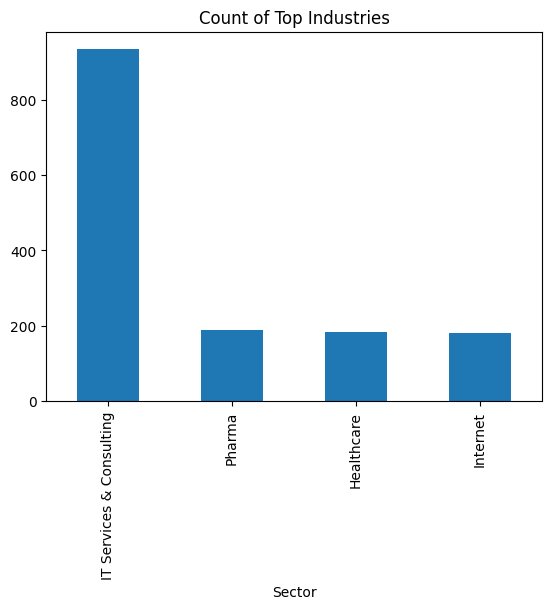

In [ ]:
condition1 = df['Sector'].value_counts() > 206
condition2 = df['Employees_Range'].value_counts() > 260

selected_companies = condition1[condition1].index.tolist()
selected_employees = condition2[condition2].index.tolist()

filtered_df = df[df['Sector'].isin(selected_companies) & df['Employees_Range'].isin(selected_employees)]

filtered_df['Sector'].value_counts().plot(kind='bar')

plt.title(f'Count of Top Industries')

<Axes: xlabel='Employees_Range'>

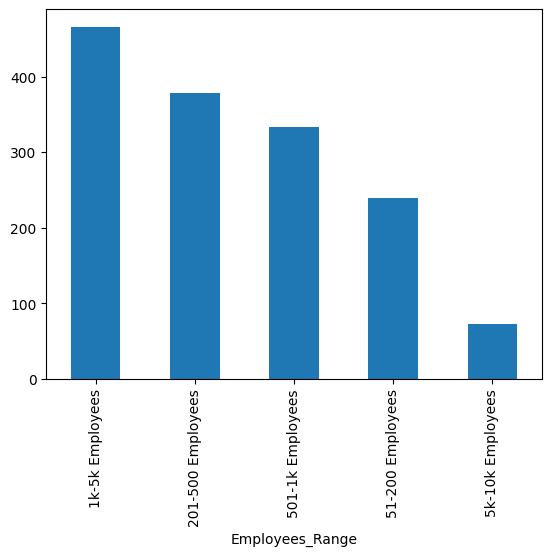

In [ ]:
filtered_df['Employees_Range'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, '1k-5k Employees'),
  Text(1, 0, '5k-10k Employees'),
  Text(2, 0, '51-200 Employees'),
  Text(3, 0, '501-1k Employees'),
  Text(4, 0, '201-500 Employees')])

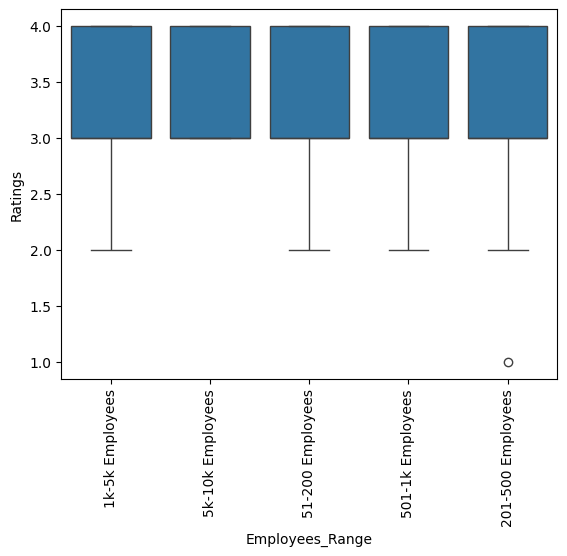

In [ ]:
sns.boxplot(x='Employees_Range', y='Ratings', data=filtered_df)
plt.xticks(rotation = (90))

Text(0.5, 1.0, 'Top Industries Ratings')

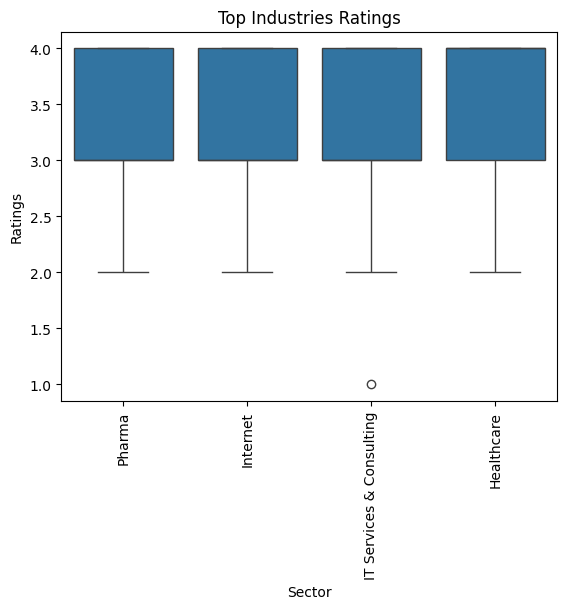

In [ ]:
sns.boxplot(x='Sector', y='Ratings', data=filtered_df)
plt.xticks(rotation = (90))
plt.title('Top Industries Ratings')

# Analysis of Highly Rated For Attributes

In [ ]:
# Preprocess 'Highly_rated_for' column
df['Highly_rated_for'] = df['Highly_rated_for'].str.split(', ')  # Split entries into lists of items

# One-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df['Highly_rated_for'])

# Create a new DataFrame with one-hot encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_concatenated = pd.concat([df, one_hot_df], axis=1)

# Display the concatenated DataFrame
df_concatenated

Company_name  Ratings  \
0                               TCS        3   
1                         Accenture        4   
2                         Cognizant        3   
3                             Wipro        3   
4                         Capgemini        3   
...                             ...      ...   
5616        Techila Global Services        3   
5617            RxLogix Corporation        2   
5618  Avians Innovations Technology        3   
5619                   ACPL Systems        3   
5620                      Beroe Inc        4   

                                       Highly_rated_for  Total_reviews  \
0                     [Job Security, Work Life Balance]          73100   
1     [Company Culture, Skill Development / Learning...          46400   
2                        [Skill Development / Learning]          41700   
3                                        [Job Security]          39200   
4     [Job Security, Work Life Balance, Skill Develo...          34000   
...                                                 ...            ...   
5616  [Work Life Balance, Salary & Benefits, Company...          72000   
5617  [Work Life Balance, Work Satisfaction, Company...          72000   
5618  [Promotions / Appraisal, Work Satisfaction, Sa...          72000   
5619  [Promotions / Appraisal, Salary & Benefits, Wo...          72000   
5620  [Work Life Balance, Job Security, Company Cult...          72000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0                 6100                847000           11500           10282   
1                 4300                  9900            7100            7015   
2                 3600                460000            5800            6738   
3                 3700                405000            5000            5128   
4                 2800                719000            4000            4972   
...                ...                   ...             ...             ...   
5616              2000                 26000           21000            5448   
5617             15000                  9000           13000            9588   
5618              3000                 11000            8000            5868   
5619              4000                  1000           10000            6240   
5620              7000                  5000           14000            7020   

      Avg_salary_INR                      Sector  ...     Years_Old  \
0             856900    IT Services & Consulting  ...  56 years old   
1             584600    IT Services & Consulting  ...  35 years old   
2             561500    IT Services & Consulting  ...  30 years old   
3             427400    IT Services & Consulting  ...  79 years old   
4             414400    IT Services & Consulting  ...  57 years old   
...              ...                         ...  ...           ...   
5616          454000    IT Services & Consulting  ...  12 years old   
5617          799000                      Pharma  ...  14 years old   
5618          489000           Building Material  ...  17 years old   
5619          520000  Law Enforcement & Security  ...  34 years old   
5620          585000       Management Consulting  ...  19 years old   

                            Location Company Culture  Job Security  \
0                   Mumbai +339 more               0             1   
1                   Dublin +173 more               1             1   
2     Teaneck. New Jersey. +156 more               0             0   
3      Bangalore/Bengaluru +276 more               0             1   
4                    Paris +139 more               0             1   
...                              ...             ...           ...   
5616              Boca Raton +4 more               1             0   
5617               Princeton +4 more               1             0   
5618                    Pune +7 more               0             0   
5619                Gurgaon +14 more       

In [ ]:
one_hot_df.head()

Company Culture  Job Security  Promotions / Appraisal  Salary & Benefits  \
0                0             1                       0                  0   
1                1             1                       0                  0   
2                0             0                       0                  0   
3                0             1                       0                  0   
4                0             1                       0                  0   

   Skill Development / Learning  Work Life Balance  Work Satisfaction  nan  
0                             0                  1                  0    0  
1                             1                  0                  0    0  
2                             1                  0                  0    0  
3                             0                  0                  0    0  
4                             1                  1                  0    0

In [ ]:
df_concatenated.head()

Company_name  Ratings                                   Highly_rated_for  \
0          TCS        3                  [Job Security, Work Life Balance]   
1    Accenture        4  [Company Culture, Skill Development / Learning...   
2    Cognizant        3                     [Skill Development / Learning]   
3        Wipro        3                                     [Job Security]   
4    Capgemini        3  [Job Security, Work Life Balance, Skill Develo...   

   Total_reviews  Interviews_taken  Total_jobs_available  Total_benefits  \
0          73100              6100                847000           11500   
1          46400              4300                  9900            7100   
2          41700              3600                460000            5800   
3          39200              3700                405000            5000   
4          34000              2800                719000            4000   

   Avg_salary_USD  Avg_salary_INR                    Sector  ...  \
0           10282          856900  IT Services & Consulting  ...   
1            7015          584600  IT Services & Consulting  ...   
2            6738          561500  IT Services & Consulting  ...   
3            5128          427400  IT Services & Consulting  ...   
4            4972          414400  IT Services & Consulting  ...   

      Years_Old                        Location Company Culture  Job Security  \
0  56 years old                Mumbai +339 more               0             1   
1  35 years old                Dublin +173 more               1             1   
2  30 years old  Teaneck. New Jersey. +156 more               0             0   
3  79 years old   Bangalore/Bengaluru +276 more               0             1   
4  57 years old                 Paris +139 more               0             1   

   Promotions / Appraisal  Salary & Benefits  Skill Development / Learning  \
0                       0                  0                             0   
1                       0                  0                             1   
2                       0                  0                             1   
3                       0                  0                             0   
4                       0                  0                             1   

   Work Life Balance  Work Satisfaction  nan  
0                  1                  0    0  
1                  0                  0    0  
2                  0                  0    0  
3                  0                  0    0  
4                  1                  0    0  

[5 rows x 21 columns]

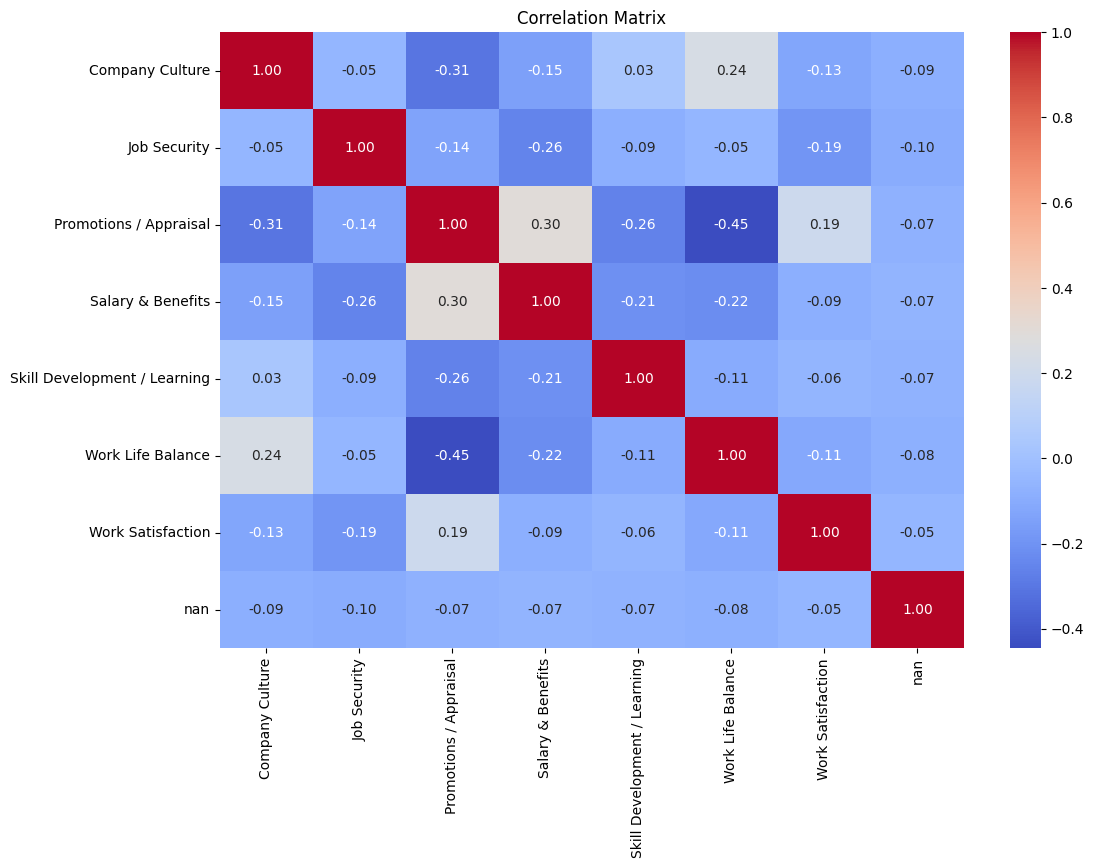

In [ ]:
# Correlation matrix
correlation_matrix = one_hot_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Salary & Benefits and Promotions / Appraisal have a slight correlation.

In [ ]:
df_concatenated.columns

Index(['Company_name', 'Ratings', 'Highly_rated_for', 'Total_reviews',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits',
       'Avg_salary_USD', 'Avg_salary_INR', 'Sector', 'Employees_Range',
       'Years_Old', 'Location', 'Company Culture', 'Job Security',
       'Promotions / Appraisal', 'Salary & Benefits',
       'Skill Development / Learning', 'Work Life Balance',
       'Work Satisfaction', 'nan'],
      dtype='object')

In [ ]:
# Extract highly rated category columns
highly_rated_columns = ['Company Culture', 'Job Security', 'Promotions / Appraisal',
                       'Salary & Benefits', 'Skill Development / Learning',
                       'Work Life Balance', 'Work Satisfaction']

# Print the list of highly rated categories
print("Highly Rated Categories:")
print(highly_rated_columns)

Highly Rated Categories:
['Company Culture', 'Job Security', 'Promotions / Appraisal', 'Salary & Benefits', 'Skill Development / Learning', 'Work Life Balance', 'Work Satisfaction']


Job security is picked most for both clusters. Next, company culture and work life balance.

In both clusters, genereally salary & benefits and work satisfaction are not the highest rated categories.

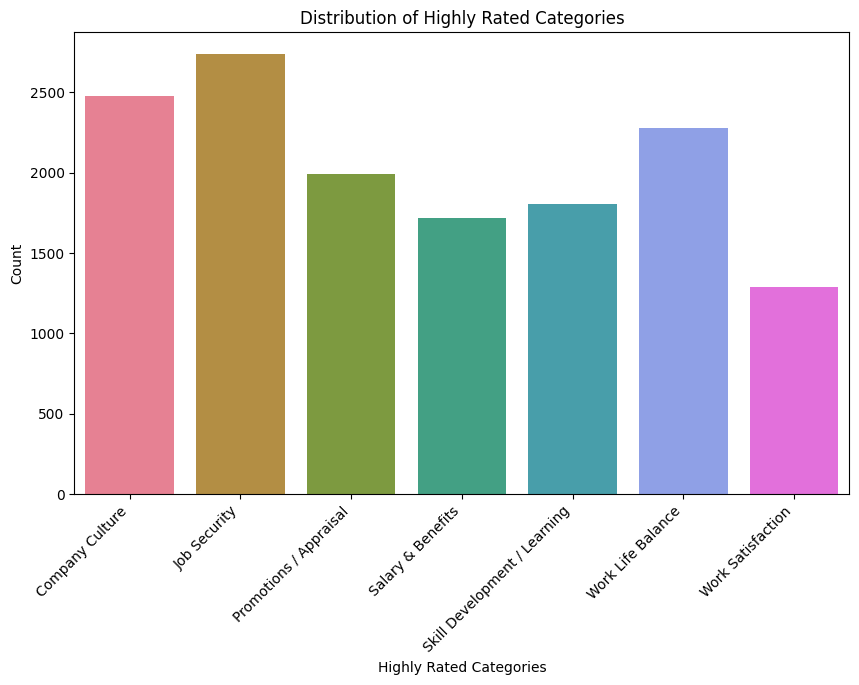

In [ ]:
# Filter the DataFrame to include only highly rated columns
df_highly_rated = df_concatenated[highly_rated_columns]

# Calculate the sum of highly rated categories
highly_rated_counts = df_highly_rated.sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=highly_rated_counts.index, y=highly_rated_counts.values, palette='husl')
plt.title('Distribution of Highly Rated Categories')
plt.xlabel('Highly Rated Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Density Curves






Text(0.5, 1.0, 'Average Salary (USD)')

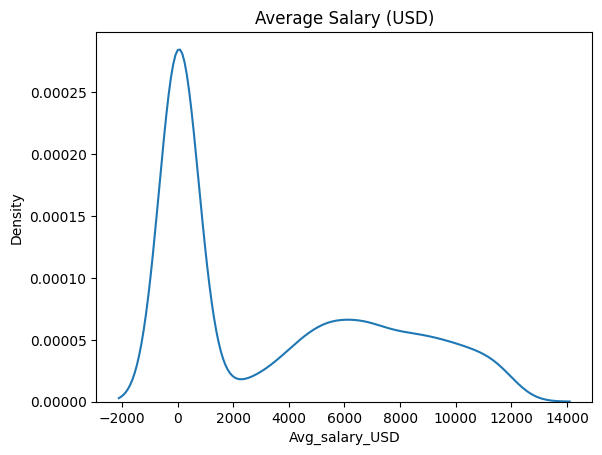

In [ ]:
ax = sns.kdeplot(data = df, x = 'Avg_salary_USD')
ax.set_title('Average Salary (USD)')

Average salary is right skewed.

Text(0.5, 1.0, 'Ratings')

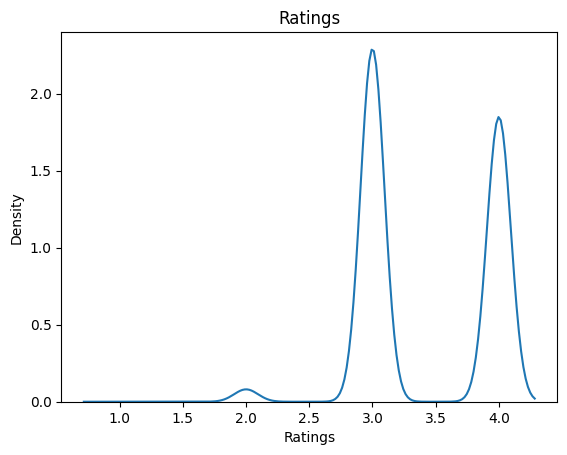

In [ ]:
ax = sns.kdeplot(data = df, x = 'Ratings')
ax.set_title('Ratings')

Ratings has a peak at 4. Most companies were rated as a 4.

Text(0.5, 1.0, 'Total_benefits')

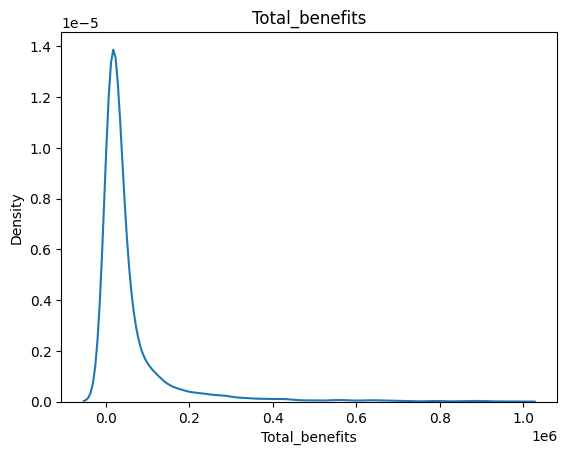

In [ ]:
ax = sns.kdeplot(data = df, x = 'Total_benefits')
ax.set_title('Total_benefits')

Total benefits is right skewed.

Text(0.5, 1.0, 'Average Salary (USD)')

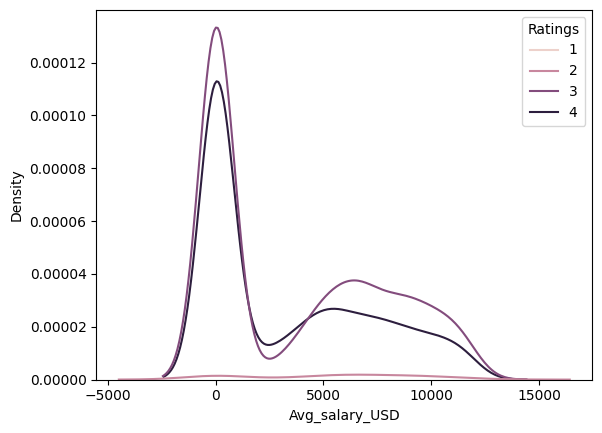

In [ ]:
sns.kdeplot(data = df_concatenated, x = 'Avg_salary_USD', hue = 'Ratings')
ax.set_title('Average Salary (USD)')

Average salary does not make a significant difference in rating.

Text(0.5, 1.0, 'Total Benefits')

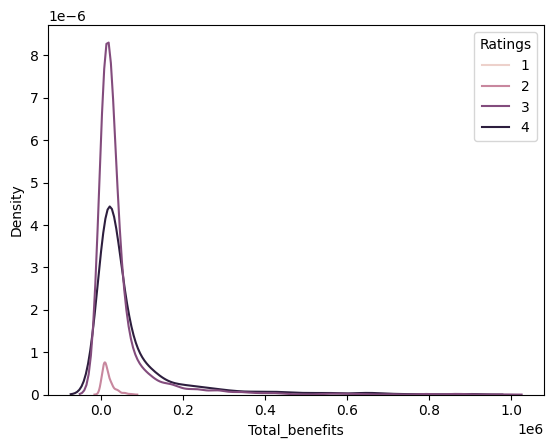

In [ ]:
sns.kdeplot(data = df_concatenated, x = 'Total_benefits', hue = 'Ratings')
ax.set_title('Total Benefits')

More benefits might lead to a better rating.

Cluster 1 is almost normal in distribution for average salary, but right skewed for total benefits. Cluster 2 is right skewed for both.

# Outliers

In [ ]:
def outliers_df(column):
  outliers = {}
  iqr = column.quantile(.75) - column.quantile(.25)
  lower_fence = column.quantile(.25) - 1.5*iqr
  upper_fence = column.quantile(.75) + 1.5*iqr
  for index, value in column.items():
    if value > upper_fence or value < lower_fence:
      outliers[index]= value

  return outliers

In [ ]:
outliers_dict = outliers_df(df['Avg_salary_USD'])
outliers_dict

{}

In [ ]:
#Examine the rows
#Get rows from dataframe using the indices from the outliers dictionary
outliers_indices = list(outliers_dict.keys())
outliers_df = df.loc[outliers_indices]
outliers_df

Empty DataFrame
Columns: [Company_name, Ratings, Highly_rated_for, Total_reviews, Interviews_taken, Total_jobs_available, Total_benefits, Avg_salary_USD, Avg_salary_INR, Sector, Employees_Range, Years_Old, Location]
Index: []

# Z-Score

In [ ]:
x1_scale = (df['Avg_salary_USD'] - df['Avg_salary_USD'].mean())/df['Avg_salary_USD'].std()

In [ ]:
x1_scale.head()

0    1.695118
1    0.873385
2    0.803712
3    0.398756
4    0.359518
Name: Avg_salary_USD, dtype: float64

In [ ]:
x1_scale.describe()

count    5.621000e+03
mean     4.045075e-17
std      1.000000e+00
min     -8.880471e-01
25%     -8.847772e-01
50%     -7.683210e-01
75%      8.595508e-01
max      2.121202e+00
Name: Avg_salary_USD, dtype: float64

In [ ]:
#Let's compare the skewness
print(f'The unscaled Average Salary has skewness of {df.Avg_salary_USD.skew()} and the scaled data has skewness {x1_scale.skew()}')

The unscaled Average Salary has skewness of 0.5786146462883306 and the scaled data has skewness 0.5786146462883305


Text(0.5, 1.0, 'Scaled Average Salary')

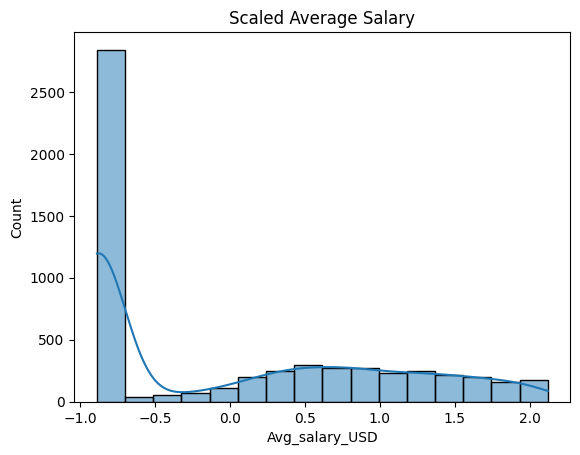

In [ ]:
sns.histplot(data = x1_scale, kde = True)
plt.title(f'Scaled Average Salary')

Text(0.5, 1.0, 'Scaled Boxplot of Average Salary')

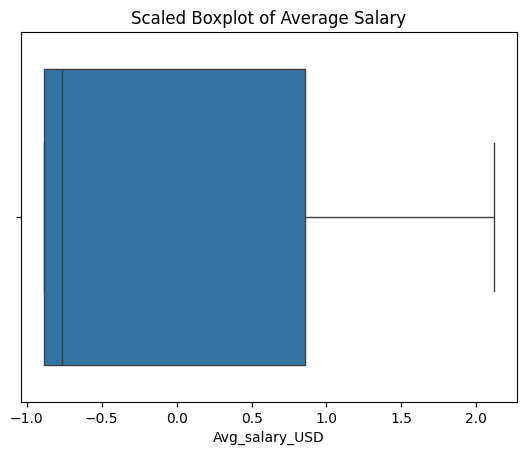

In [ ]:
sns.boxplot(x = x1_scale)
plt.title(f'Scaled Boxplot of Average Salary')

Average salary is right-skewed in these visuals using the z-score.

In [ ]:
# Create a dictionary to store outliers (index as key, z-score as value)
outliers_dict = {}

# Iterate through the z-scores and identify outliers
for i, z_score in enumerate(x1_scale):
    if np.abs(z_score) >= 2.5:
        outliers_dict[i] = z_score

# Print the dictionary of outliers
print("Dictionary of outliers:", outliers_dict)

Dictionary of outliers: {}


No scaled outliers for Average Salary

In [ ]:
from scipy.stats import zscore
#Demonstrate with Final
x2_scale = zscore(df['Total_benefits'])

# Create a dictionary to store outliers (index as key, z-score as value)
outliers_dict = {}

# Iterate through the z-scores and identify outliers
for i, z_score in enumerate(x2_scale):
    if np.abs(z_score) >= 2.5:
        outliers_dict[i] = z_score

# Print the dictionary of outliers
print("Dictionary of outliers:", outliers_dict)

Dictionary of outliers: {25: 4.461630071676171, 30: 7.33411960279137, 32: 4.254337012729714, 36: 6.554302857230886, 37: 7.353861798881509, 38: 7.82767450504484, 39: 5.715259523399986, 40: 6.83069360249283, 41: 8.123807446396922, 42: 7.975740975720881, 44: 6.406236386554845, 46: 4.994669366109919, 50: 8.360713799478589, 51: 5.636290739039431, 52: 8.262002819027893, 53: 8.716073329101087, 54: 8.15342074053213, 55: 4.688665326712768, 56: 5.883068190166166, 57: 5.182220228966238, 58: 7.896772191360326, 59: 7.097213249709704, 60: 5.705388425354917, 61: 5.557321954678876, 62: 4.6096965423522125, 63: 7.511799367602619, 64: 6.32726760219429, 65: 8.183034034667338, 66: 6.090361249112624, 67: 3.9779462674677704, 68: 8.35084270143352, 69: 6.218685523698526, 70: 5.99165026866193, 71: 8.360713799478589, 72: 5.735001719490126, 73: 6.238427719788665, 74: 7.186053132115329, 75: 7.205795328205467, 76: 6.554302857230886, 77: 3.7607821104762436, 78: 5.231575719191586, 79: 5.6165485429492925, 80: 5.340157

25 outliers for total benefits when scaled.

# Categorical Variables

Text(0.5, 1.0, 'Count of Ratings')

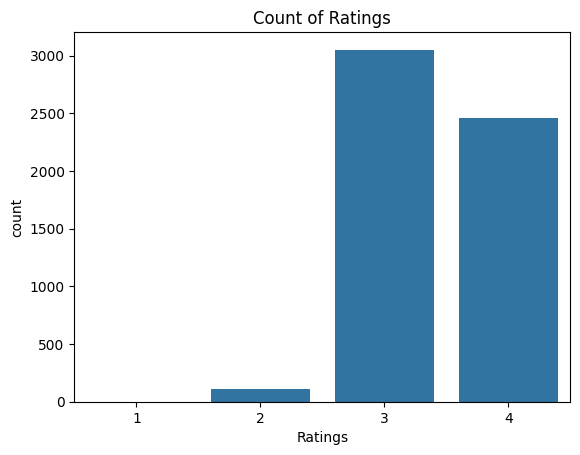

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Ratings')
ax.set_title('Count of Ratings')

A significant difference in the count distribution of Ratings with a rating of 4 having the most counts and 2 having the least.

Text(0.5, 1.0, 'Percent of Count Ratings')

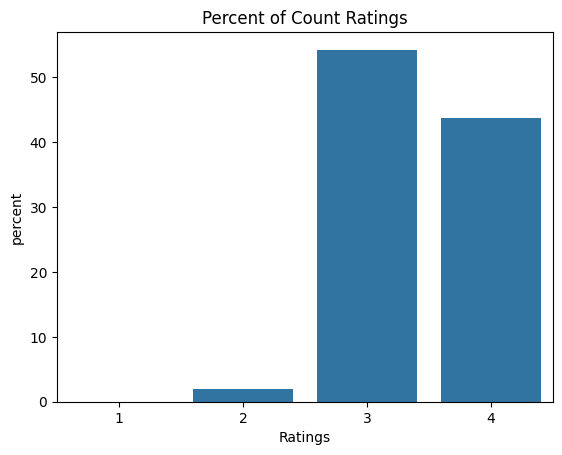

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Ratings', stat = 'percent')
ax.set_title('Percent of Count Ratings')

This graph shows the percentage of how many rated 4. Rarely 2 was rated for a company.

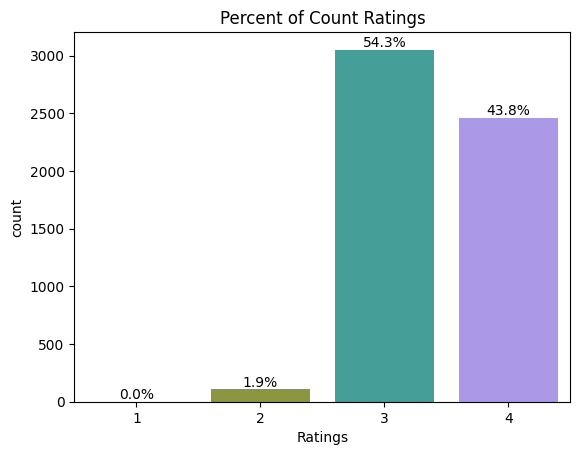

In [ ]:
# Create a count plot
ax = sns.countplot(data=df, x='Ratings', palette='husl')

# Set title
ax.set_title('Percent of Count Ratings')

# Calculate the percentage of each category
total = len(df_concatenated)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Count of Job Security')

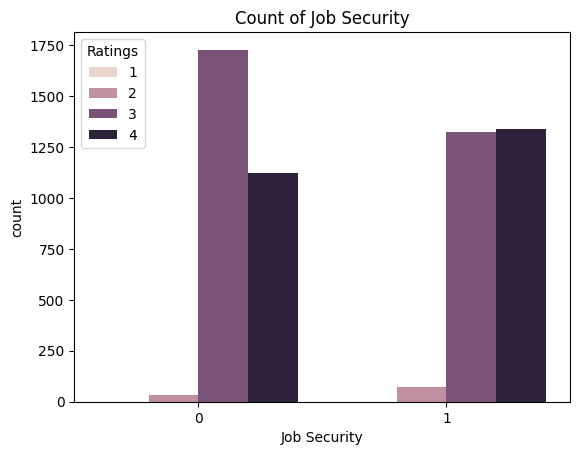

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Job Security', hue = 'Ratings')
ax.set_title('Count of Job Security')

Text(0.5, 1.0, 'Count of Company Culture')

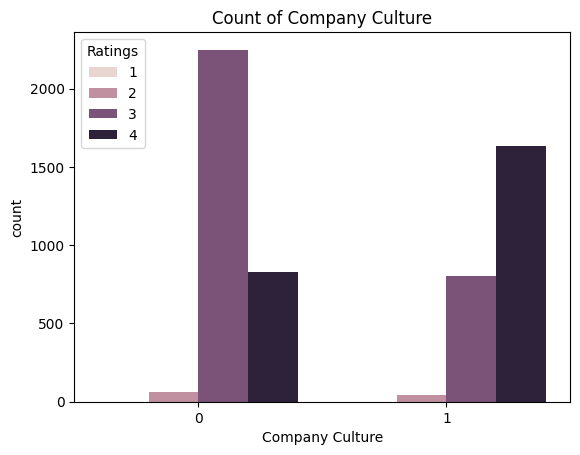

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Company Culture', hue = 'Ratings')
ax.set_title('Count of Company Culture')

Text(0.5, 1.0, 'Count of Work Life Balance')

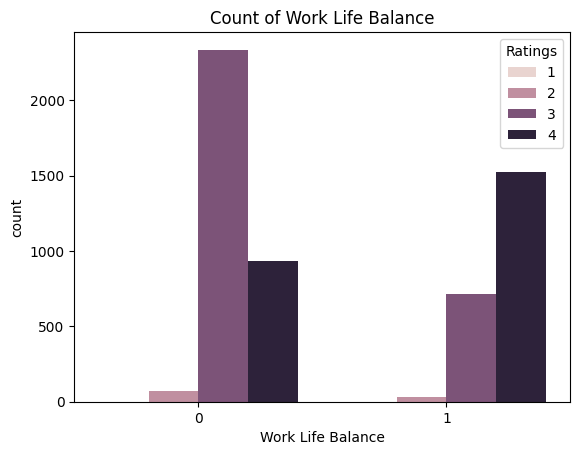

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Work Life Balance', hue = 'Ratings')
ax.set_title('Count of Work Life Balance')

Text(0.5, 1.0, 'Count of Job Security over Ratings')

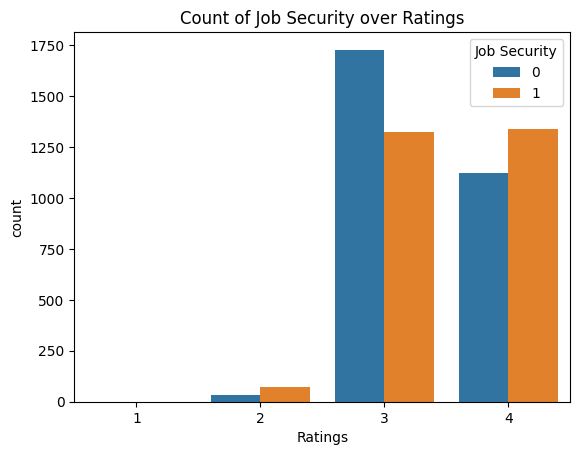

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Ratings', hue = 'Job Security')
ax.set_title('Count of Job Security over Ratings')

Text(0.5, 1.0, 'Count of Company Culture over Ratings')

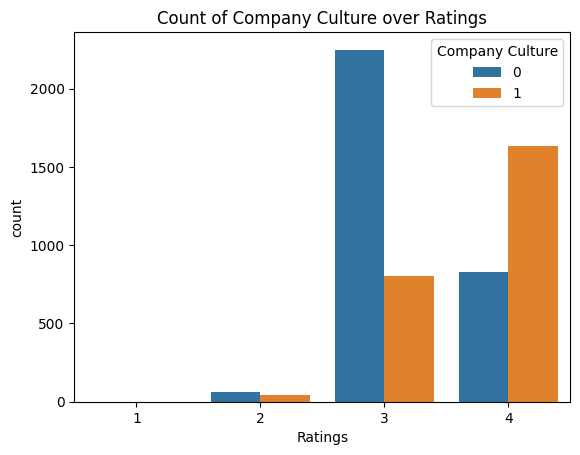

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Ratings', hue = 'Company Culture')
ax.set_title('Count of Company Culture over Ratings')

Text(0.5, 1.0, 'Count of Work Life Balance')

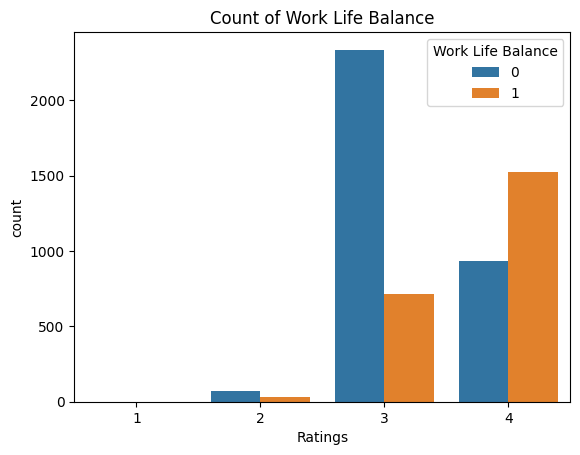

In [ ]:
ax = sns.countplot(data = df_concatenated, x = 'Ratings', hue = 'Work Life Balance')
ax.set_title('Count of Work Life Balance')

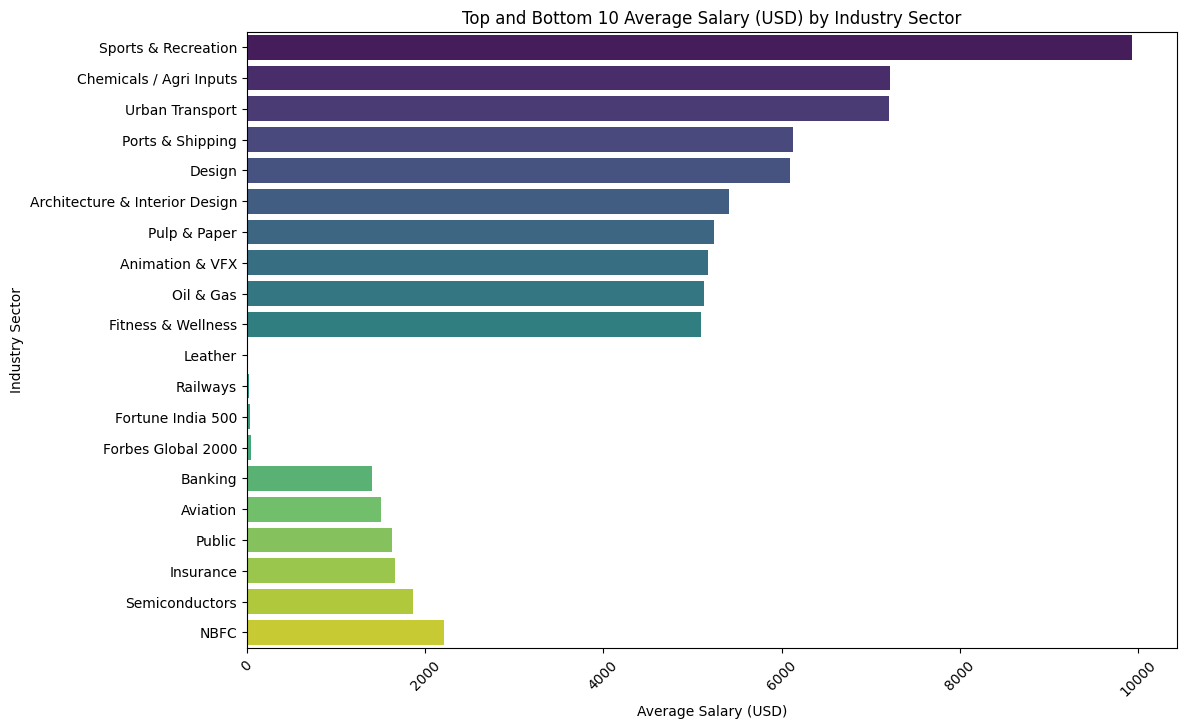

In [ ]:
# Top - Bottom Industries

industry_salary = df.groupby('Sector')['Avg_salary_USD'].mean().reset_index()
top_industries = industry_salary.nlargest(10, 'Avg_salary_USD')
bottom_industries = industry_salary.nsmallest(10, 'Avg_salary_USD')
top_bottom_industries = pd.concat([top_industries, bottom_industries])

plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_salary_USD', y='Sector', data=top_bottom_industries, ci=None, palette='viridis')
plt.title('Top and Bottom 10 Average Salary (USD) by Industry Sector')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Industry Sector')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

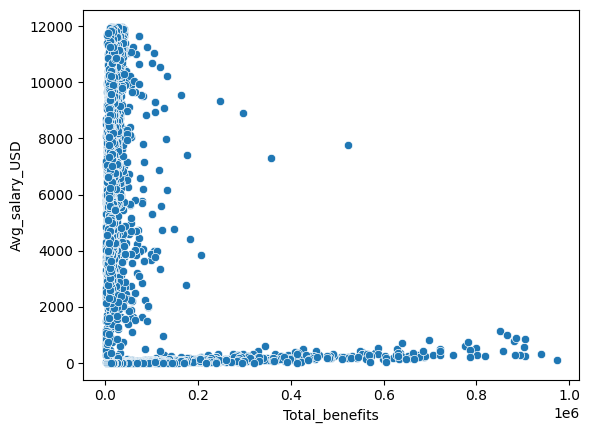

In [ ]:
ax = sns.scatterplot(data = df, x = 'Total_benefits', y ='Avg_salary_USD')

In this graph, total benefits does not seem play a significant role in the average salary.

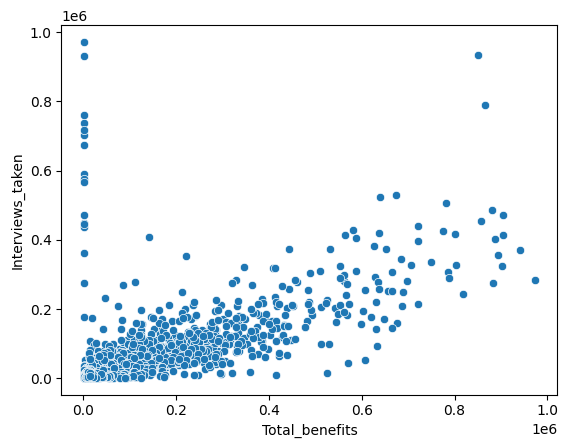

In [ ]:
ax = sns.scatterplot(data = df, x = 'Total_benefits', y ='Interviews_taken')

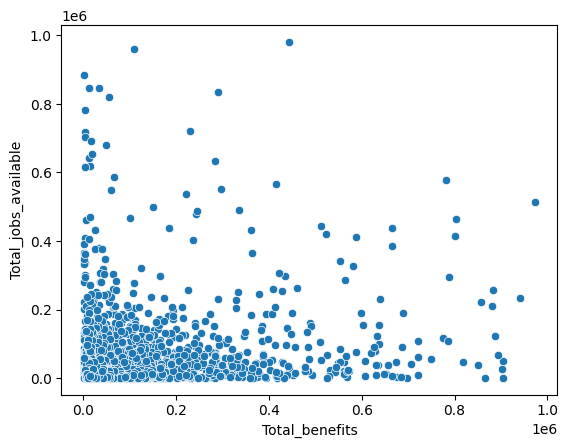

In [ ]:
ax = sns.scatterplot(data = df, x = 'Total_benefits', y ='Total_jobs_available')

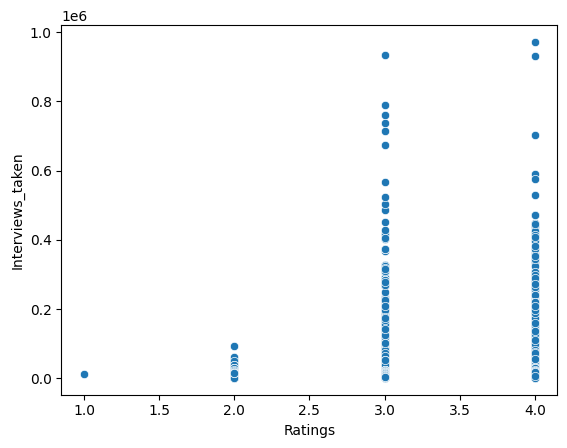

In [ ]:
ax = sns.scatterplot(data = df, x = 'Ratings', y ='Interviews_taken')

# Pairplot

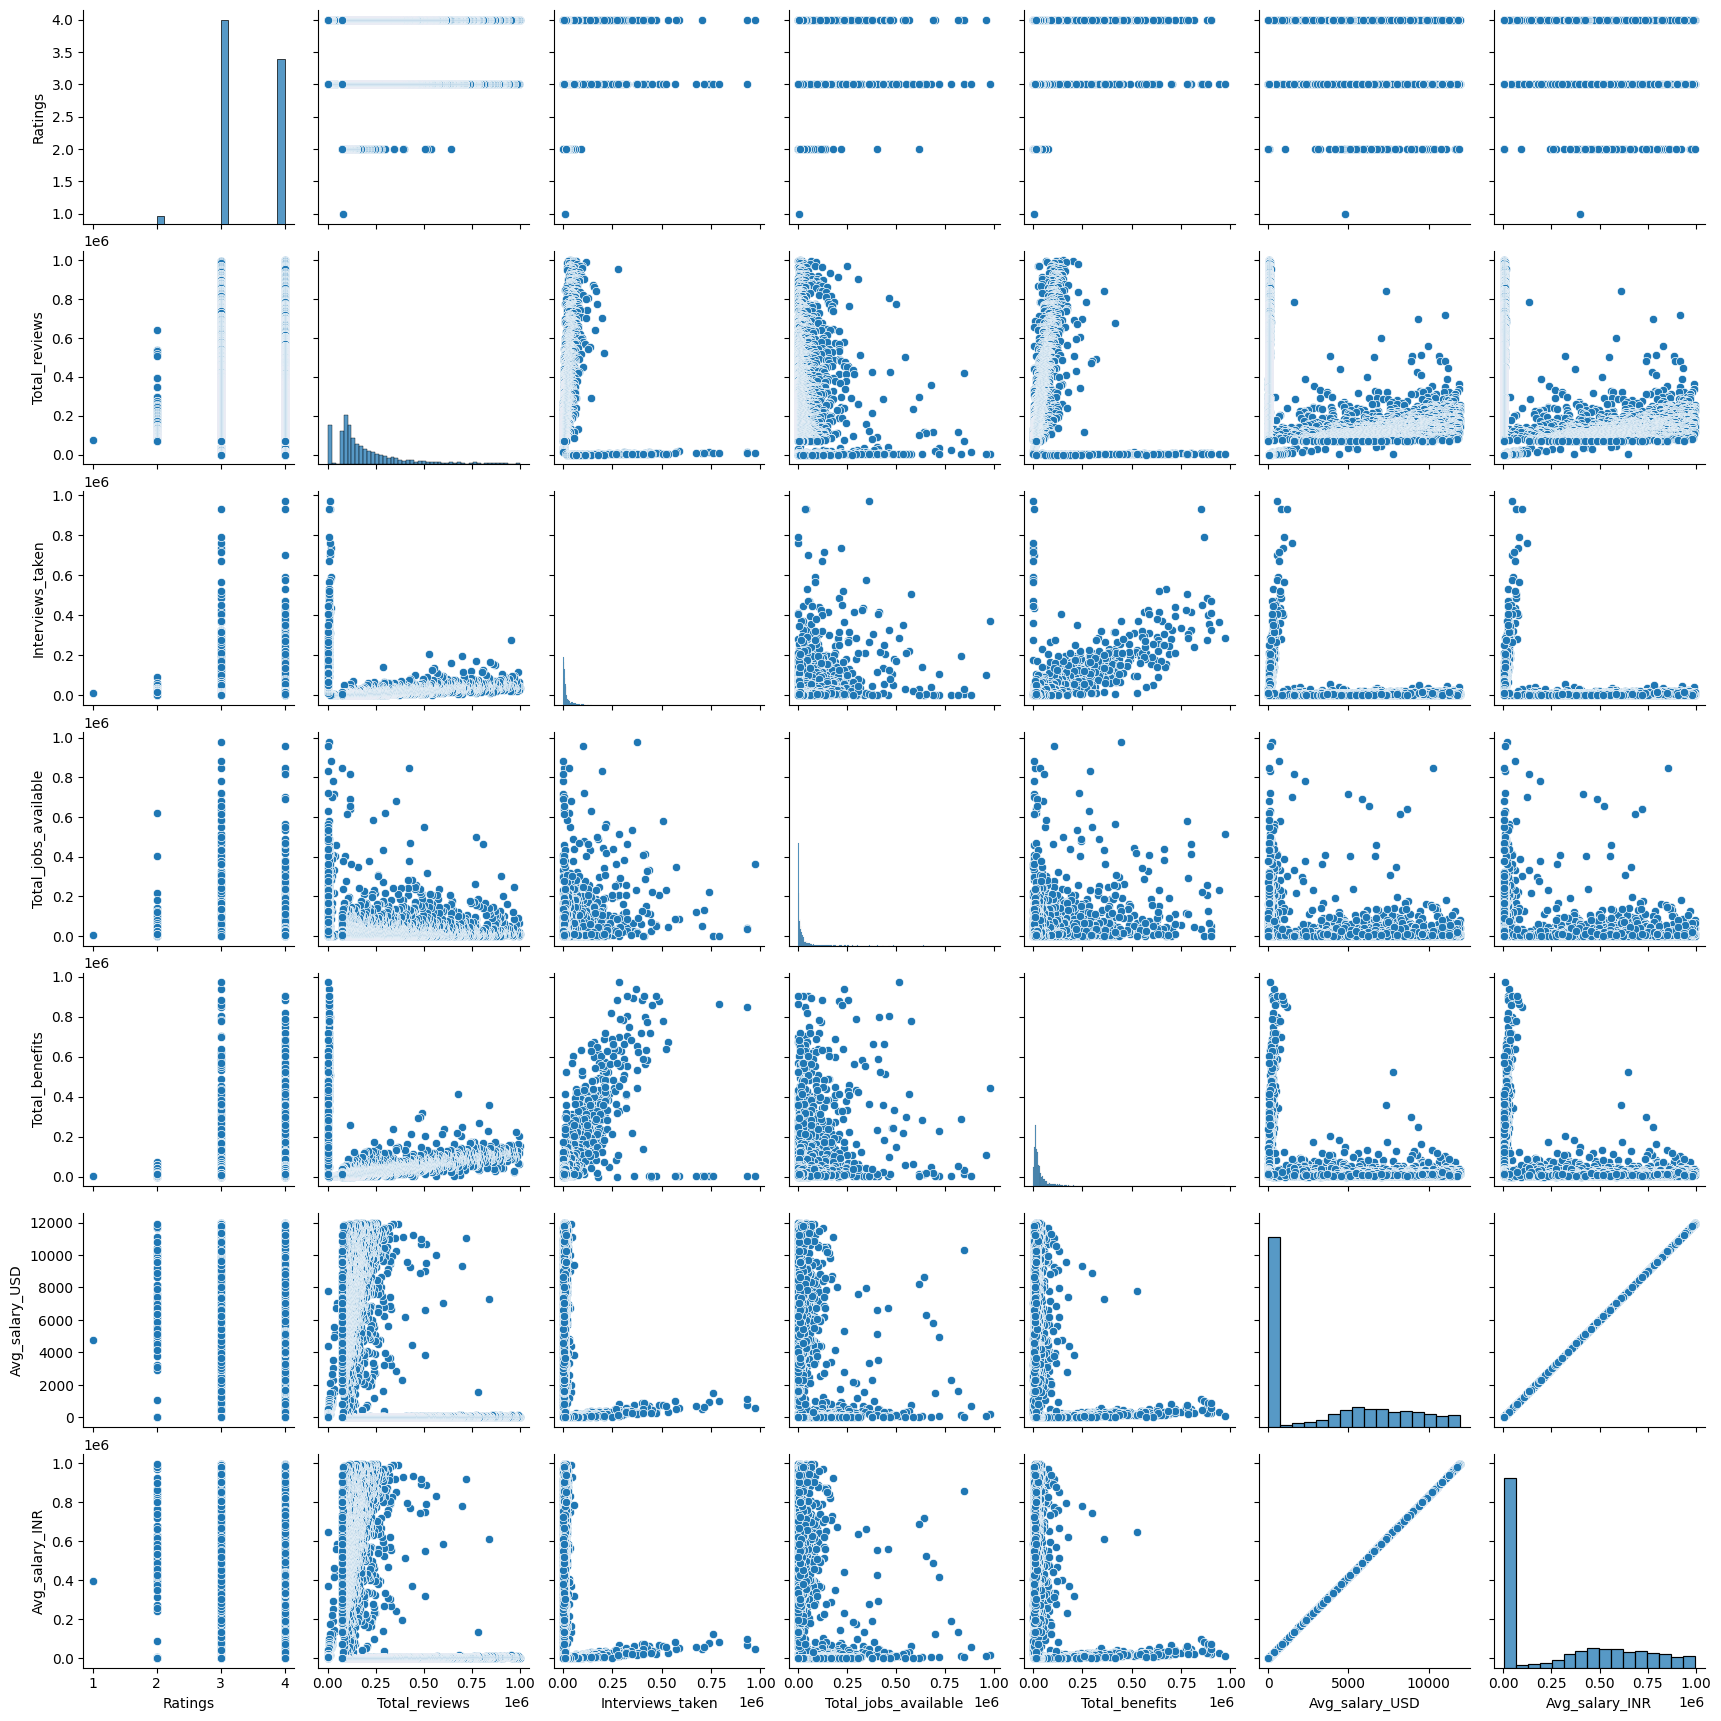

In [ ]:
sns.pairplot(df)

# Joint-Plot

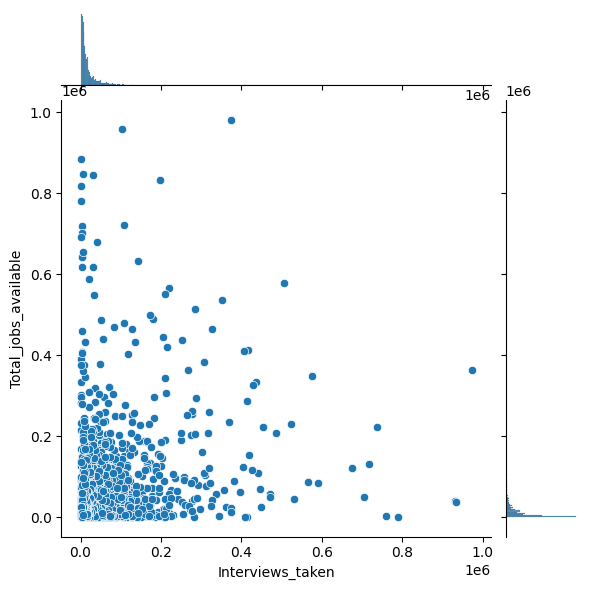

In [ ]:
sns.jointplot(data = df, x = 'Interviews_taken', y = 'Total_jobs_available')

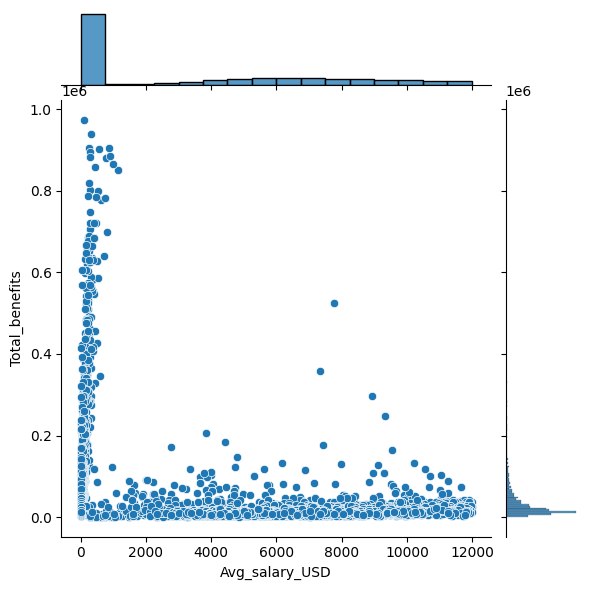

In [ ]:
sns.jointplot(data = df, x = 'Avg_salary_USD', y = 'Total_benefits')

More benefits does not equate to higher salaries.

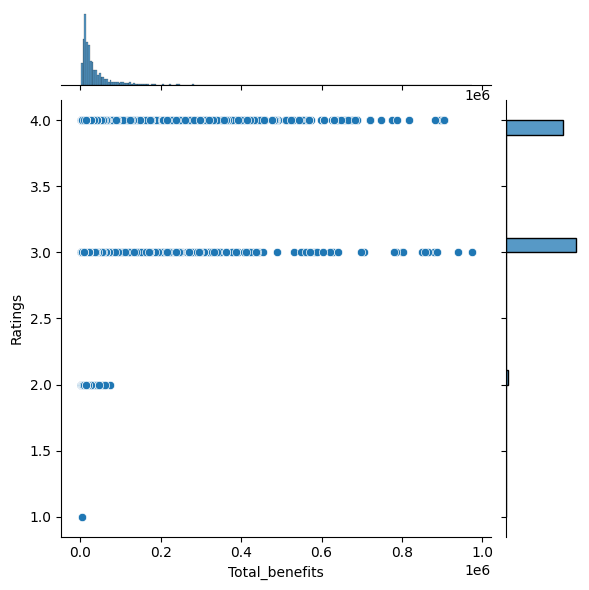

In [ ]:
sns.jointplot(data = df, x = 'Total_benefits', y = 'Ratings')

More total benefits will most likely lead a company to higher ratings.

# Correlation Matrix / Heatmap

In [ ]:
X = np.column_stack((df['Avg_salary_USD'], df['Total_benefits']))

In [ ]:
# Calculate the means of each variable
means = np.mean(X, axis=0)

# Calculate the deviations from the mean for each variable
deviations = X - means

In [ ]:
# Calculate the covariance matrix
covariance_matrix = np.dot(deviations.T, deviations) / (len(X) - 1)

# Calculate the standard deviations of each variable
std_deviations = np.sqrt(np.diag(covariance_matrix))

# Calculate the correlation matrix
correlation_matrix = covariance_matrix / np.outer(std_deviations, std_deviations)

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[ 1.         -0.32587714]
 [-0.32587714  1.        ]]


In both clusters, total benefits and total reviews have some correlation.

Text(0.5, 1.0, 'Correlation Matrix for DataFrame')

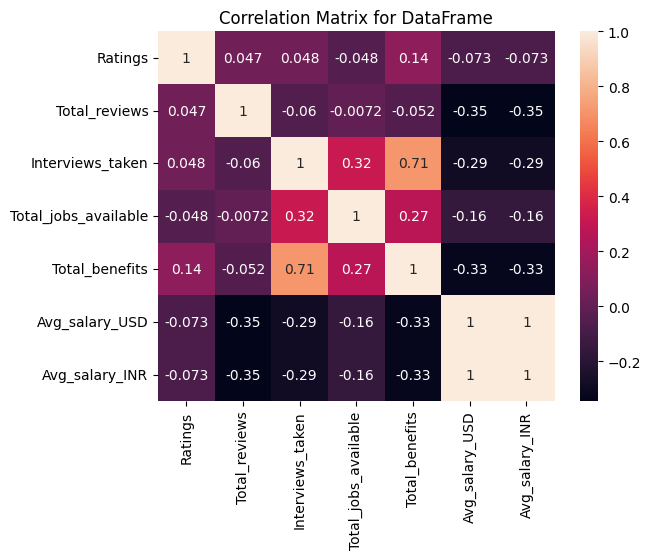

In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot = True)

plt.title(f'Correlation Matrix for DataFrame')

Total reviews and average salary might have a slight correlation. Also total reviews and total benefits.

# Categorical Variables

In [ ]:
 #contigency table

con_table = pd.crosstab(df['Avg_salary_USD'], df['Ratings'])
con_table

Ratings         1  2    3   4
Avg_salary_USD               
12              0  5   73  47
13              0  2  131  76
14              0  1  113  74
15              0  1  106  66
16              0  0   55  58
...            .. ..  ...  ..
11928           0  1    0   0
11940           0  0    1   2
11952           0  0    1   3
11964           0  0    1   0
11976           0  0    2   1

[1073 rows x 4 columns]

In [ ]:
con_table = pd.crosstab(df['Total_benefits'], df['Ratings'])
con_table

Ratings         1  2  3  4
Total_benefits            
1000            0  2  4  6
1100            0  0  0  1
1200            0  0  2  2
1300            0  0  2  1
1400            0  0  1  0
...            .. .. .. ..
894000          0  0  0  1
903000          0  0  0  1
904000          0  0  0  2
940000          0  0  1  0
973000          0  0  1  0

[449 rows x 4 columns]

Text(0.5, 1.0, 'Total benefits by Ratings')

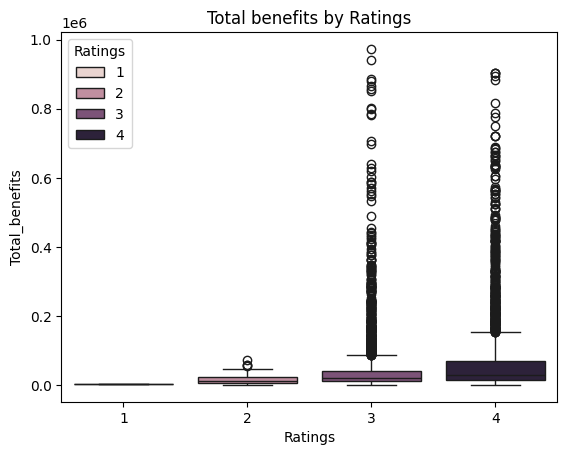

In [ ]:
ax = sns.boxplot(data = df, x = 'Ratings', y = 'Total_benefits', hue = 'Ratings', dodge = False)
ax.set_title('Total benefits by Ratings')

This graph shows that, despite the outliers in the ratings of 4, total benefits may have an effect on how a company is rated. This shows that if a company has above 50 benefits then they are predicted to have a 3, 4 or 5 rating.

Text(0.5, 1.0, 'Average salary (USD) by Ratings')

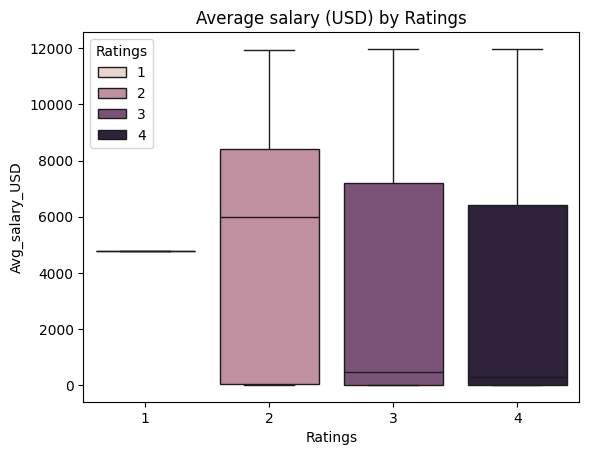

In [ ]:
ax = sns.boxplot(data = df, x = 'Ratings', y = 'Avg_salary_USD', hue = 'Ratings', dodge = False)
ax.set_title('Average salary (USD) by Ratings')

Higher average salaries rated either a 3 or 4, but this graph is not significant enough to prove that higher average salary effects a companies rating.

Text(0.5, 1.0, 'Average salary (USD) by Job Security')

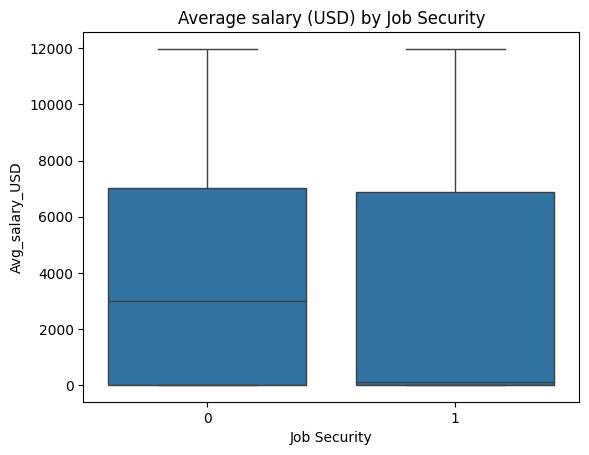

In [ ]:
ax = sns.boxplot(data = df_concatenated, x = 'Job Security', y = 'Avg_salary_USD', dodge = False)
ax.set_title('Average salary (USD) by Job Security')

Text(0.5, 1.0, 'Average salary (USD) by Company Culture')

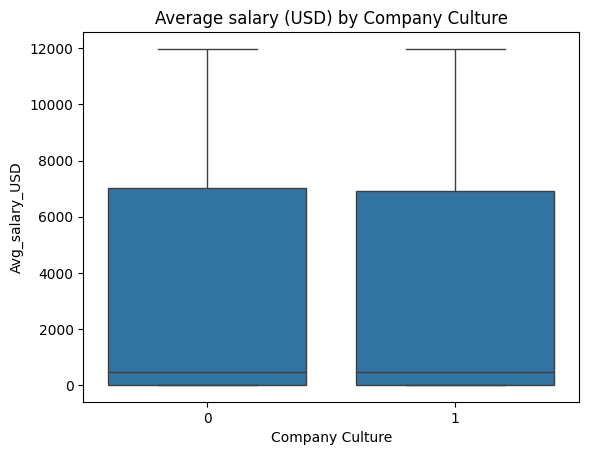

In [ ]:
ax = sns.boxplot(data = df_concatenated, x = 'Company Culture', y = 'Avg_salary_USD', dodge = False)
ax.set_title('Average salary (USD) by Company Culture')

# Top Companies Analysis



In [ ]:
# Define bins and labels for ratings categories
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bin edges
labels = ['Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good']  # Define labels for each bin

# Create a new categorical feature based on ratings
df['rating_category'] = pd.cut(df['Ratings'], bins=bins, labels=labels, right=False)

# Display the DataFrame
df

Company_name  Ratings  \
0                               TCS        3   
1                         Accenture        4   
2                         Cognizant        3   
3                             Wipro        3   
4                         Capgemini        3   
...                             ...      ...   
5616        Techila Global Services        3   
5617            RxLogix Corporation        2   
5618  Avians Innovations Technology        3   
5619                   ACPL Systems        3   
5620                      Beroe Inc        4   

                                       Highly_rated_for  Total_reviews  \
0                     [Job Security, Work Life Balance]          73100   
1     [Company Culture, Skill Development / Learning...          46400   
2                        [Skill Development / Learning]          41700   
3                                        [Job Security]          39200   
4     [Job Security, Work Life Balance, Skill Develo...          34000   
...                                                 ...            ...   
5616  [Work Life Balance, Salary & Benefits, Company...          72000   
5617  [Work Life Balance, Work Satisfaction, Company...          72000   
5618  [Promotions / Appraisal, Work Satisfaction, Sa...          72000   
5619  [Promotions / Appraisal, Salary & Benefits, Wo...          72000   
5620  [Work Life Balance, Job Security, Company Cult...          72000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0                 6100                847000           11500           10282   
1                 4300                  9900            7100            7015   
2                 3600                460000            5800            6738   
3                 3700                405000            5000            5128   
4                 2800                719000            4000            4972   
...                ...                   ...             ...             ...   
5616              2000                 26000           21000            5448   
5617             15000                  9000           13000            9588   
5618              3000                 11000            8000            5868   
5619              4000                  1000           10000            6240   
5620              7000                  5000           14000            7020   

      Avg_salary_INR                      Sector    Employees_Range  \
0             856900    IT Services & Consulting  1 Lakh+ Employees   
1             584600    IT Services & Consulting  1 Lakh+ Employees   
2             561500    IT Services & Consulting  1 Lakh+ Employees   
3             427400    IT Services & Consulting  1 Lakh+ Employees   
4             414400    IT Services & Consulting  1 Lakh+ Employees   
...              ...                         ...                ...   
5616          454000    IT Services & Consulting   501-1k Employees   
5617          799000                      Pharma  201-500 Employees   
5618          489000           Building Material   51-200 Employees   
5619          520000  Law Enforcement & Security   51-200 Employees   
5620          585000       Management Consulting  201-500 Employees   

         Years_Old                        Location rating_category  
0     56 years old                Mumbai +339 more         Neutral  
1     35 years old                Dublin +173 more            Good  
2     30 years old  Teaneck. New Jersey. +156 more         Neutral  
3     79 years old   Bangalore/Bengaluru +276 more         Neutral  
4     57 years old                 Paris +139 more         Neutral  
...            ...                             ...             ...  
5616  12 years old              Boca Raton +4 more         Neutral  
5617  14 years old               Princeton +4 more             Bad  
5618  17 years old                    Pune +7 more         Neutral  
5619  34 years old                Gurgaon +14 more   

In [ ]:
neutral_df = df[df['rating_category'] == 'Neutral']
good_df = df[df['rating_category'] == 'Good']

neutral_df

Company_name  Ratings  \
0                                  TCS        3   
2                            Cognizant        3   
3                                Wipro        3   
4                            Capgemini        3   
7                              Infosys        3   
...                                ...      ...   
5613  Cambridge Technology Enterprises        3   
5614                   Freight Systems        3   
5616           Techila Global Services        3   
5618     Avians Innovations Technology        3   
5619                      ACPL Systems        3   

                                       Highly_rated_for  Total_reviews  \
0                     [Job Security, Work Life Balance]          73100   
2                        [Skill Development / Learning]          41700   
3                                        [Job Security]          39200   
4     [Job Security, Work Life Balance, Skill Develo...          34000   
7     [Job Security, Company Culture, Skill Developm...          31800   
...                                                 ...            ...   
5613  [Salary & Benefits, Promotions / Appraisal, Sk...          72000   
5614        [Promotions / Appraisal, Salary & Benefits]          72000   
5616  [Work Life Balance, Salary & Benefits, Company...          72000   
5618  [Promotions / Appraisal, Work Satisfaction, Sa...          72000   
5619  [Promotions / Appraisal, Salary & Benefits, Wo...          72000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
0                 6100                847000           11500           10282   
2                 3600                460000            5800            6738   
3                 3700                405000            5000            5128   
4                 2800                719000            4000            4972   
7                 4800                  1100            5100            5544   
...                ...                   ...             ...             ...   
5613              2000                 11000            5000            8664   
5614              2000                  9000            5000            6624   
5616              2000                 26000           21000            5448   
5618              3000                 11000            8000            5868   
5619              4000                  1000           10000            6240   

      Avg_salary_INR                      Sector    Employees_Range  \
0             856900    IT Services & Consulting  1 Lakh+ Employees   
2             561500    IT Services & Consulting  1 Lakh+ Employees   
3             427400    IT Services & Consulting  1 Lakh+ Employees   
4             414400    IT Services & Consulting  1 Lakh+ Employees   
7             462000    IT Services & Consulting  1 Lakh+ Employees   
...              ...                         ...                ...   
5613          722000    IT Services & Consulting  201-500 Employees   
5614          552000            Ports & Shipping   501-1k Employees   
5616          454000    IT Services & Consulting   501-1k Employees   
5618          489000           Building Material   51-200 Employees   
5619          520000  Law Enforcement & Security   51-200 Employees   

         Years_Old                        Location rating_category  
0     56 years old                Mumbai +339 more         Neutral  
2     30 years old  Teaneck. New Jersey. +156 more         Neutral  
3     79 years old   Bangalore/Bengaluru +276 more         Neutral  
4     57 years old                 Paris +139 more         Neutral  
7     43 years old   Bengaluru/Bangalore +179 more         Neutral  
...            ...                             ...             ...  
5613  25 years old                 Atlanta +3 more         Neutral  
5614  36 years old                  Dubai +13 more         Neutral  
5616  12 years old              Boca Raton +4 more         Neutral  
5618  17 years old  

In [ ]:
good_df

Company_name  Ratings  \
1                                 Accenture        4   
5                                 HDFC Bank        4   
6                                ICICI Bank        4   
14                                      Jio        4   
15                                   Amazon        4   
...                                     ...      ...   
5604         Corrival Corporate Consultants        4   
5609                             VST Motors        4   
5610  Manav Rachna International University        4   
5615              MediaTek India Technology        4   
5620                              Beroe Inc        4   

                                       Highly_rated_for  Total_reviews  \
1     [Company Culture, Skill Development / Learning...          46400   
5          [Job Security, Skill Development / Learning]          33900   
6     [Job Security, Skill Development / Learning, C...          33500   
14         [Job Security, Skill Development / Learning]          20600   
15    [Company Culture, Salary & Benefits, Work Life...          20400   
...                                                 ...            ...   
5604  [Company Culture, Work Satisfaction, Job Secur...          72000   
5609  [Work Life Balance, Work Satisfaction, Company...          72000   
5610  [Salary & Benefits, Promotions / Appraisal, Wo...          72000   
5615  [Job Security, Work Life Balance, Salary & Ben...          72000   
5620  [Work Life Balance, Job Security, Company Cult...          72000   

      Interviews_taken  Total_jobs_available  Total_benefits  Avg_salary_USD  \
1                 4300                  9900            7100            7015   
5                 1500                335000            3200            1587   
6                 1900                215000            3700            1723   
14                1200                168000            2600             807   
15                3400                702000            4200            1502   
...                ...                   ...             ...             ...   
5604              2000                  1000           14000            4992   
5609              4000                 11000            5000            5112   
5610              1000                 25000            4000            4560   
5615             17000                  4000           10000           11256   
5620              7000                  5000           14000            7020   

      Avg_salary_INR                    Sector            Employees_Range  \
1             584600  IT Services & Consulting          1 Lakh+ Employees   
5             132300                   Banking          1 Lakh+ Employees   
6             143600                   Banking          1 Lakh+ Employees   
14             67300                   Telecom       50k-1 Lakh Employees   
15            125200                  Internet          1 Lakh+ Employees   
...              ...                       ...                        ...   
5604          416000               Recruitment  501-1k Employees (Global)   
5609          426000                Automobile            1k-5k Employees   
5610          380000      Education & Training           51-200 Employees   
5615          938000            Semiconductors           501-1k Employees   
5620          585000     Management Consulting          201-500 Employees   

         Years_Old                Location rating_category  
1     35 years old        Dublin +173 more            Good  
5     30 years old       Mumbai +1531 more            Good  
6     30 years old       Mumbai +1277 more            Good  
14    17 years old  Navi Mumbai +1170 more            Good  
15    30 years old       Seattle +438 more            Good  
...            ...                     ...             ...  
5604  18 years old      Hyderabad +25 more            Good  
5609  75 years old        Chennai +13 more            Good  
5610  20 years old       Faridabad

In [ ]:
# Analyze numerical features
for feature in ['Avg_salary_USD', 'Total_benefits']:
    print("Numerical Feature:", feature)
    print("Mean (Neutral):", neutral_df[feature].mean())
    print("Mean (Good):", good_df[feature].mean())
    print("Median (Neutral):", neutral_df[feature].median())
    print("Median (Good):", good_df[feature].median())
    print("T-test p-value:", stats.ttest_ind(neutral_df[feature], good_df[feature])[1])
    print()

Numerical Feature: Avg_salary_USD
Mean (Neutral): 3703.9095378564407
Mean (Good): 3265.898862713241
Median (Neutral): 489.0
Median (Good): 290.0


NameError: name 'stats' is not defined

In [ ]:
# Analyze categorical features
for feature in ['Sector']:
    print("Categorical Feature:", feature)
    print("Neutral Ratings:")
    print(neutral_df[feature].value_counts(normalize=True))
    print("Good Ratings:")
    print(good_df[feature].value_counts(normalize=True))
    print("Chi-square test p-value:", stats.chi2_contingency(pd.crosstab(df['rating_category'], df[feature]))[1])
    print()

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Numerical Features
# Box plot for Avg_salary
sns.boxplot(x='rating_category', y='Avg_salary_USD', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Average Salary (USD) Distribution')

# Violin plot for Total_benefits
sns.violinplot(x='rating_category', y='Total_benefits', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total_benefits Distribution')

# Categorical Features

# Stacked bar plot for Sector
sns.countplot(x='Sector', hue='rating_category', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sector Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Numerical Features
# Box plot for Avg_salary
sns.boxplot(x='rating_category', y='Avg_salary_USD', data=df[df['rating_category'].isin(['Good', 'Neutral'])], ax=axes[0])
axes[0].set_title('Avgerage Salary (USD) Distribution')

# Violin plot for Total_benefits
sns.violinplot(x='rating_category', y='Total_benefits', data=df[df['rating_category'].isin(['Good', 'Neutral'])], ax=axes[1])
axes[1].set_title('Total benefits Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
good_df.describe()

In [ ]:
neutral_df.describe()

# Top Ratings

In [ ]:
df['Total_reviews'].describe()

In [ ]:
df['Total_reviews'].unique()

# Significance Testing

In [ ]:
from scipy import stats
# Filter for companies highly rated for Job Security
work_satisfaction_group = df[df_concatenated['Job Security'] == 1]['Avg_salary_USD']

# Filter for companies highly rated for Work Life Balance
salary_benefits_group = df[df_concatenated['Work Life Balance'] == 1]['Avg_salary_USD']

# Perform significance testing (two-sample t-test)
t_statistic, p_value = stats.ttest_ind(work_satisfaction_group, salary_benefits_group)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average salaries between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average salaries between the two groups.")

T-Statistic: -0.9825714092576925
P-Value: 0.32586587735181183
Fail to reject the null hypothesis: There is no significant difference in average salaries between the two groups.


In [ ]:
from scipy import stats
# Filter for companies highly rated for Job Security
work_satisfaction_group = df[df_concatenated['Job Security'] == 1]['Ratings']

# Filter for companies highly rated for Work Life Balance
salary_benefits_group = df[df_concatenated['Work Life Balance'] == 1]['Ratings']

# Perform significance testing (two-sample t-test)
t_statistic, p_value = stats.ttest_ind(work_satisfaction_group, salary_benefits_group)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between the two groups.")

T-Statistic: -12.908549466847838
P-Value: 1.5885971112196895e-37
Reject the null hypothesis: There is a significant difference in ratings between the two groups.


In [ ]:
from scipy.stats import ttest_ind

# Hypothesis testing for Total benefits and Ratings
t_stat_tb, p_value_tb = ttest_ind(df['Total_benefits'], df['Ratings'])

# Hypothesis testing for Average salary and Ratings
t_stat_as, p_value_as = ttest_ind(df['Avg_salary_USD'], df['Ratings'])

# Print results
print("Hypothesis testing results:")
print("Total benefits vs. Ratings:")
print("   p-value:", p_value_tb)
print("Average salary vs. Ratings:")
print("   p-value:", p_value_as)

Hypothesis testing results:
Total benefits vs. Ratings:
   p-value: 0.0
Average salary vs. Ratings:
   p-value: 0.0


In [ ]:
from scipy.stats import chi2_contingency
# Perform Chi-Square Test for Job Security
job_security = pd.crosstab(df_concatenated['Job Security'], df_concatenated['Ratings'])
chi2_job_security, p_job_security, _, _ = chi2_contingency(job_security)

# Perform Chi-Square Test for Company Culture
company_culture = pd.crosstab(df_concatenated['Company Culture'], df_concatenated['Ratings'])
chi2_company_culture, p_company_culture, _, _ = chi2_contingency(company_culture)

# Perform Chi-Square Test for Work Life Balance
work_life_balance = pd.crosstab(df_concatenated['Work Life Balance'], df_concatenated['Ratings'])
chi2_work_life_balance, p_work_life_balance, _, _ = chi2_contingency(work_life_balance)

# Perform Chi-Square Test for Work Satisfaction
work_satisfaction = pd.crosstab(df_concatenated['Work Satisfaction'], df_concatenated['Ratings'])
chi2_work_satisfaction, p_work_satisfaction, _, _ = chi2_contingency(work_satisfaction)

# Print p-values
print("Job Security p-value:", p_job_security)
print("Company Culture p-value:", p_company_culture)
print("Work Life Balance p-value:", p_work_life_balance)
print("Work Satisfaction p-value:", p_work_satisfaction)

Job Security p-value: 1.3724018177088509e-17
Company Culture p-value: 1.3746783543843583e-191
Work Life Balance p-value: 6.005531578330764e-183
Work Satisfaction p-value: 1.630716586023502e-07


In [ ]:
if p_job_security < alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null")

Reject null hypothesis


In [ ]:
if p_company_culture< alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null")

Reject null hypothesis


In [ ]:
if p_work_life_balance < alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null")

Reject null hypothesis


In [ ]:
if p_work_satisfaction < alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null")

Reject null hypothesis


# Conclusion

### **Conclusion:**


### **Recommendations:**

1. **More Benefits:**
   - Improve employee satisfaction by offering competitive benefits packages, including health insurance, retirement plans, and wellness programs.

2. **Company Culture**
   - Cultivate a positive and inclusive company culture by prioritizing diversity, equity, and inclusion initiatives, as well as providing opportunities for professional growth and open communication.

3. **Job Security**
   - Instill confidence and trust among employees by implementing fair and transparent policies related to job security and investing in employee training and upskilling programs.

Implementing these recommendations can help companies align with the characteristics of highly-rated organizations, attracting and retaining top talent while promoting employee satisfaction and well-being.

### **What I would change**
I would cluster similar companies together using the company description. The description includes many characteristics and factors I should have considered. For a more thorough analysis, this might be the way to go to help specific companies.